In [1]:
library(DBI)
library(odbc)
library(RSQLite)
library(dplyr)
library(ggplot2)
if (!require("car")) install.packages("car")
if (!require("tibble")) install.packages("tibble")
if (!require("gridExtra")) install.packages("gridExtra")
if (!require("gtools")) install.packages("gtools")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.2"
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Loading required package: tibble

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: gtools


Attaching package: 'gtools'


The following object is masked from 'package:car':

    logit




In [2]:
con <- dbConnect(odbc(), 
                 Driver = "SQL Server", 
                 Server = "DESKTOP-AAGNMGA\\SQLEXPRESS", 
                 Database = "RenewableEnergy", 
                 Trusted_Connection = "True")

In [3]:
df <- dbReadTable(con,"Energy_flatfile")

In [4]:
summary(df)

 CountryName        CountryCode             Year       SP_POP_TOTL       
 Length:13778       Length:13778       Min.   :1960   Min.   :4.279e+03  
 Class :character   Class :character   1st Qu.:1974   1st Qu.:8.274e+05  
 Mode  :character   Mode  :character   Median :1988   Median :5.446e+06  
                                       Mean   :1987   Mean   :1.425e+08  
                                       3rd Qu.:2001   3rd Qu.:2.755e+07  
                                       Max.   :2015   Max.   :7.261e+09  
                                                      NA's   :294        
 EN_CO2_OTHX_ZS   EG_USE_COMM_GD_PP_KD EG_USE_COMM_FO_ZS ER_H2O_INTR_K3   
 Min.   :-2.381   Min.   :   4.991     Min.   :  0.00    Min.   :    0.0  
 1st Qu.: 1.136   1st Qu.:  96.756     1st Qu.: 46.32    1st Qu.:    9.5  
 Median : 2.783   Median : 130.556     Median : 77.71    Median :   60.0  
 Mean   : 4.862   Mean   : 166.097     Mean   : 67.56    Mean   : 1419.3  
 3rd Qu.: 5.271   3rd Qu.: 188.80

In [6]:
df70 <- df[df$Year >=1970,]
df90 <- df[df$Year >=1990,]

In [14]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),"CountryName")
    missdata <- data.frame(CountryName=data$CountryName)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missing <- missingMatrix(data=df)
df_missing

CountryName,CountryCode,Year,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0,0,0,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
Afghanistan,0,0,0,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
Afghanistan,0,0,0,1,1,1,0,1,1,...,1,1,0,1,1,0,1,1,1,1
Afghanistan,0,0,0,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
Afghanistan,0,0,0,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
Afghanistan,0,0,0,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
Afghanistan,0,0,0,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
Afghanistan,0,0,0,1,1,1,0,1,1,...,1,1,0,1,1,0,1,1,1,1
Afghanistan,0,0,0,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1


Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


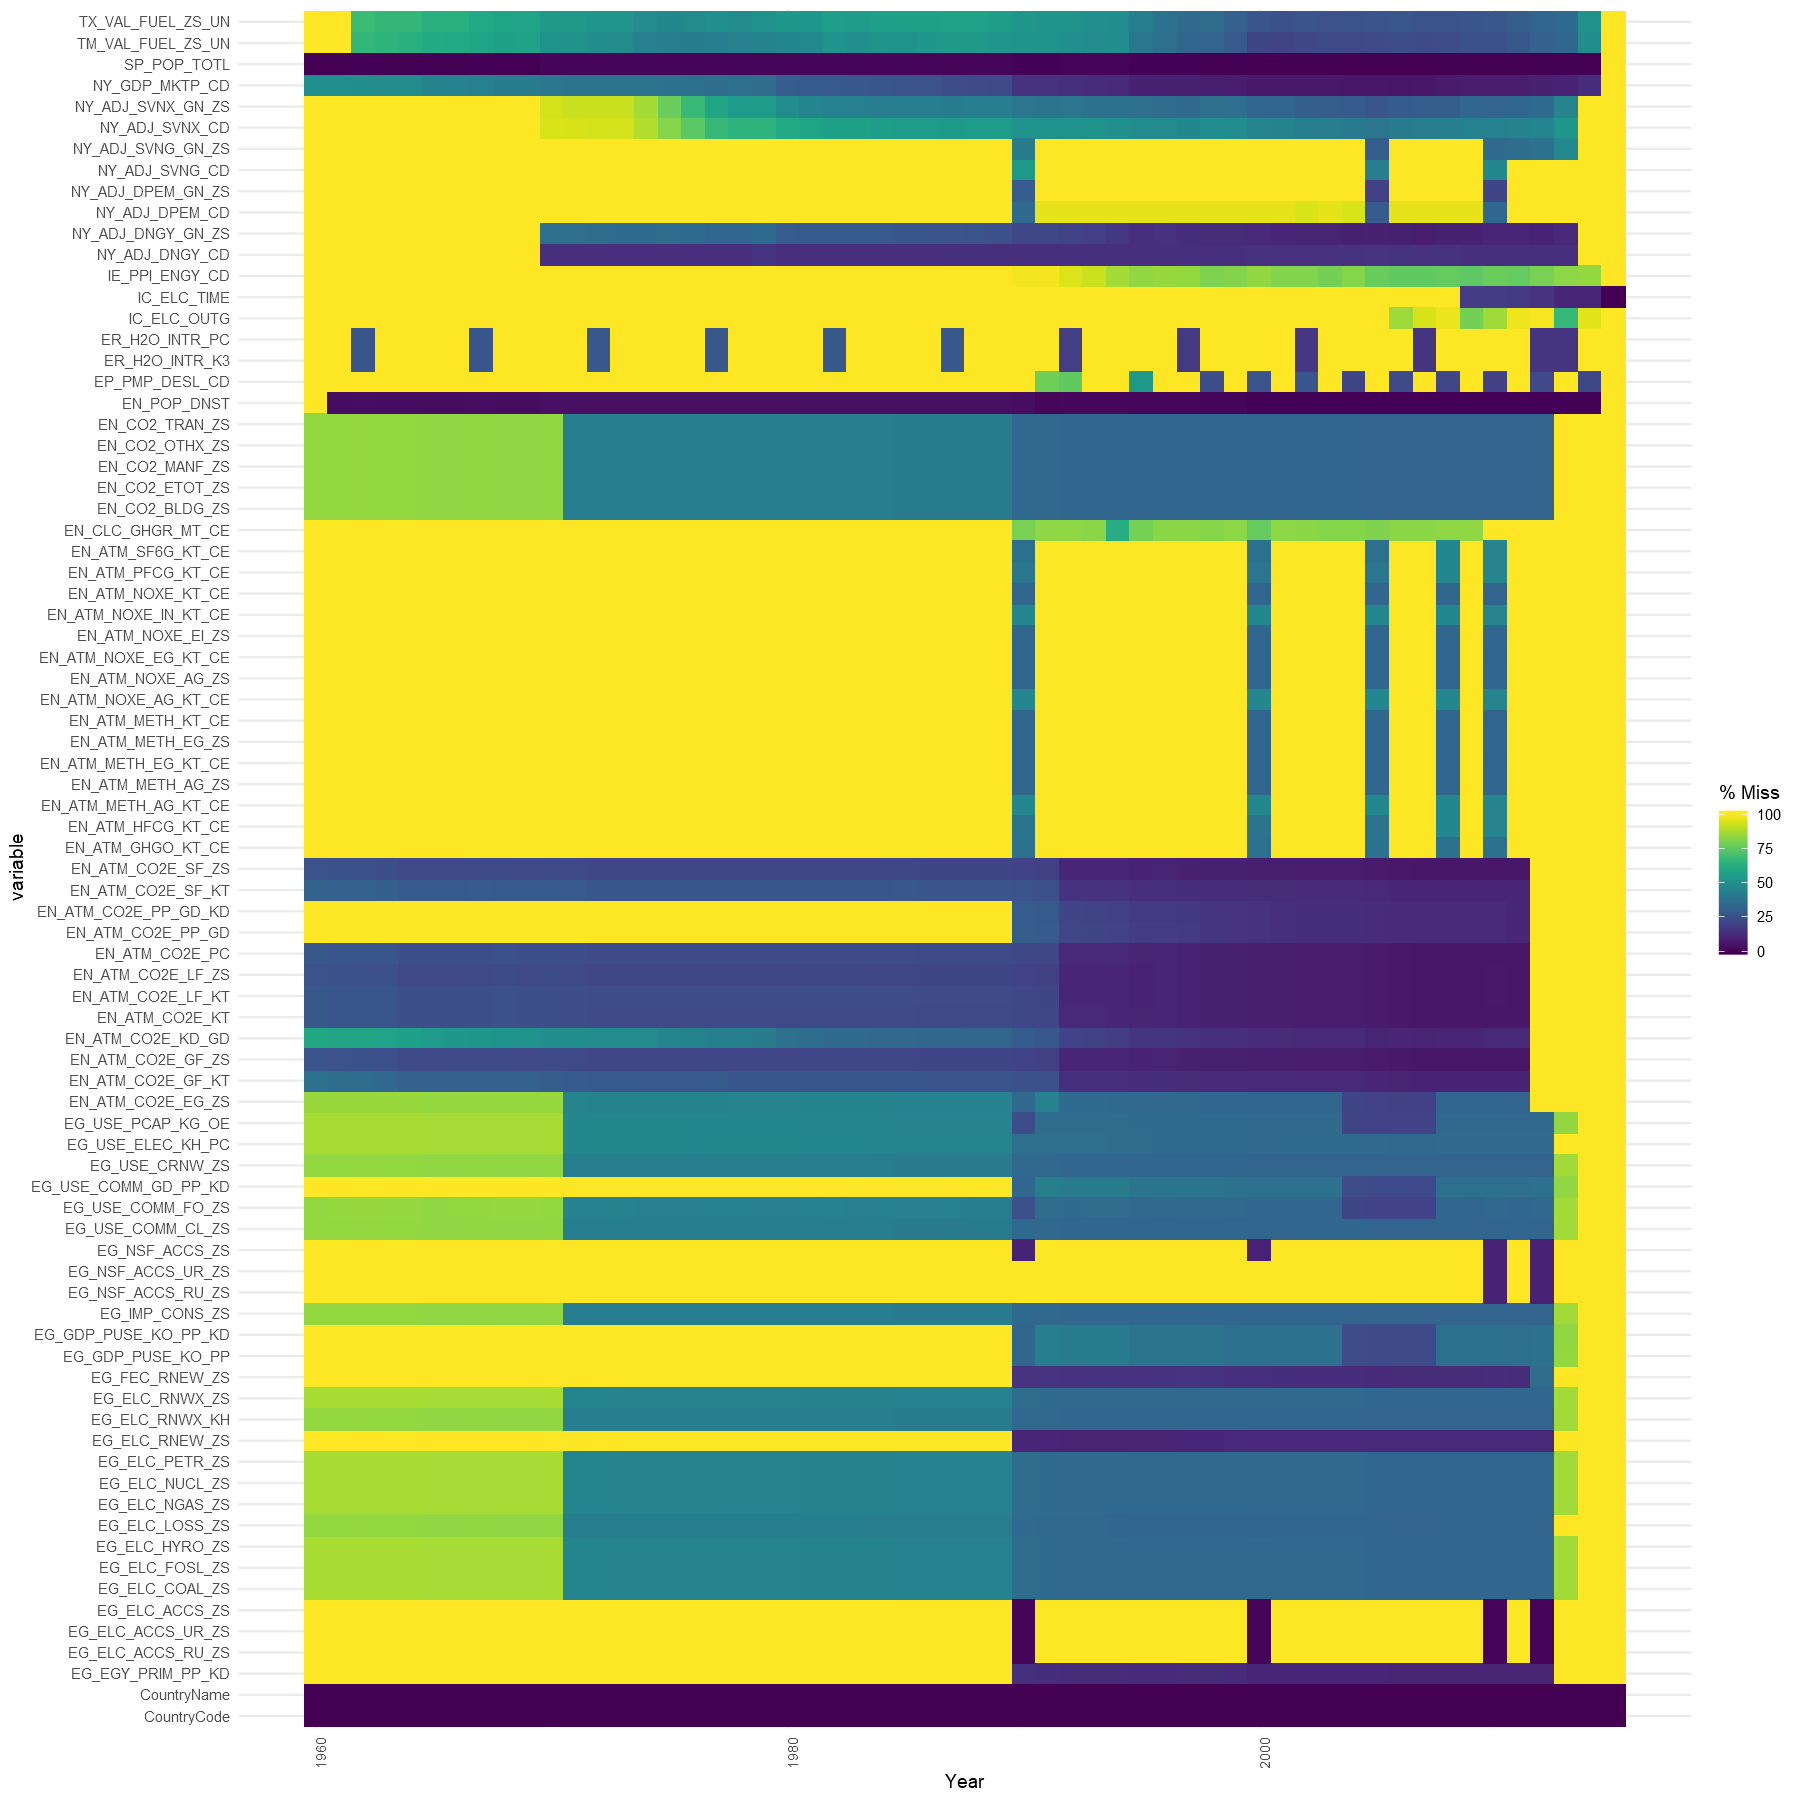

In [22]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=df, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=8))

Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


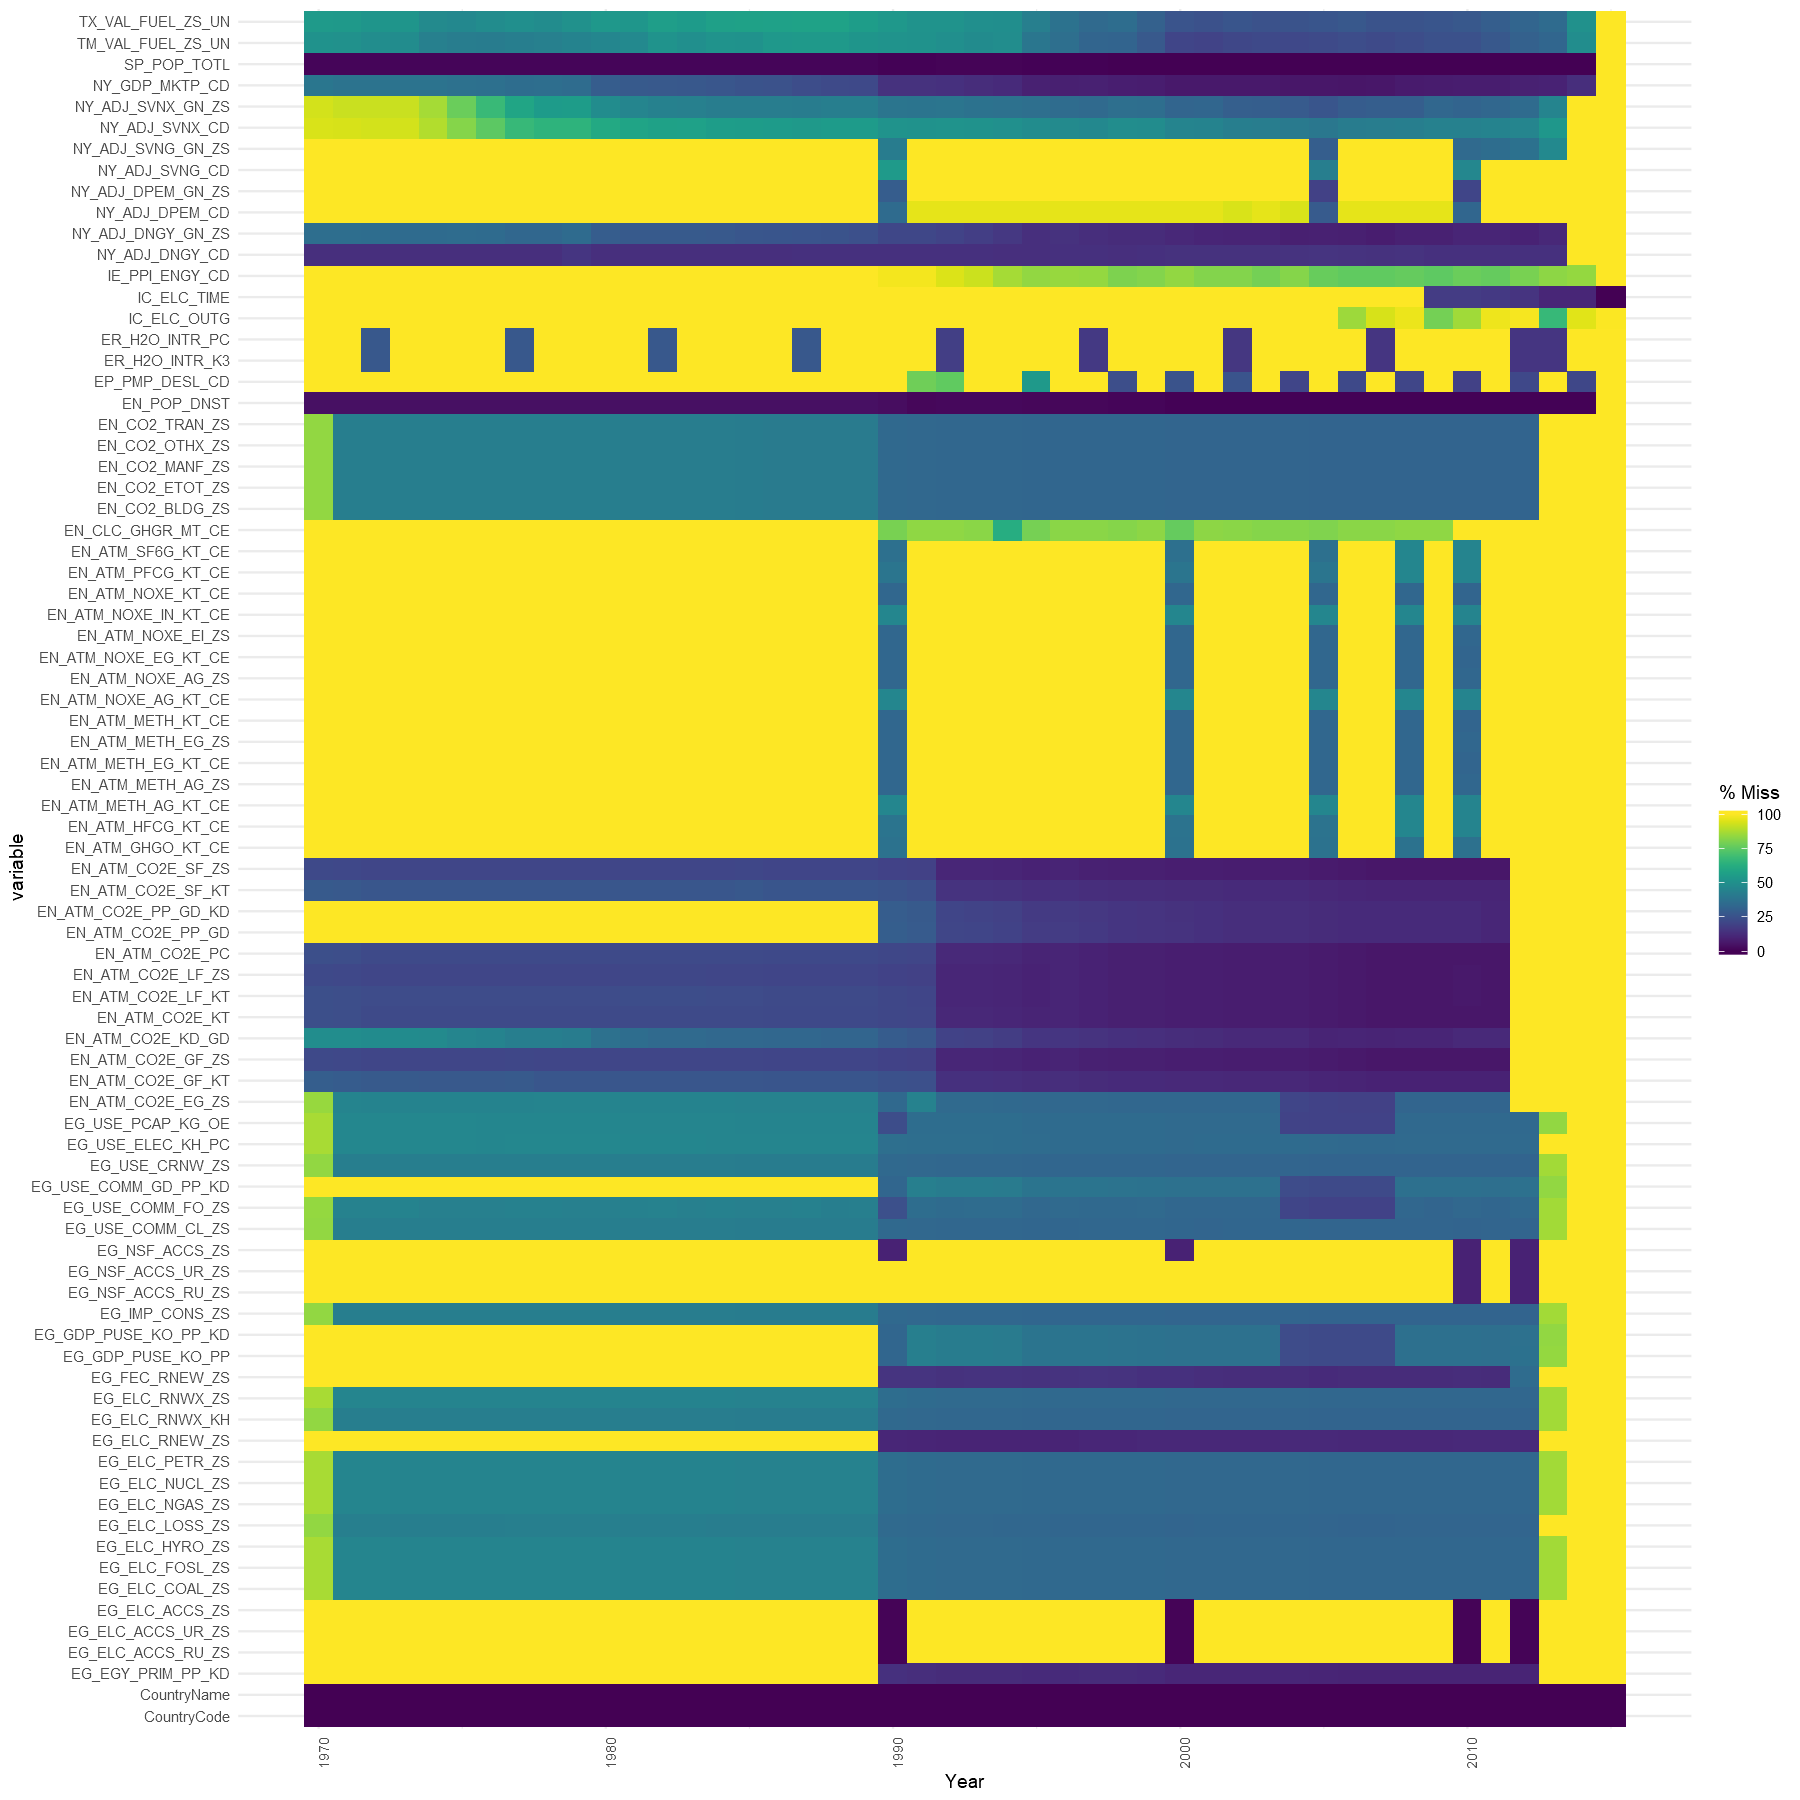

In [7]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=df70, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=8))

Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


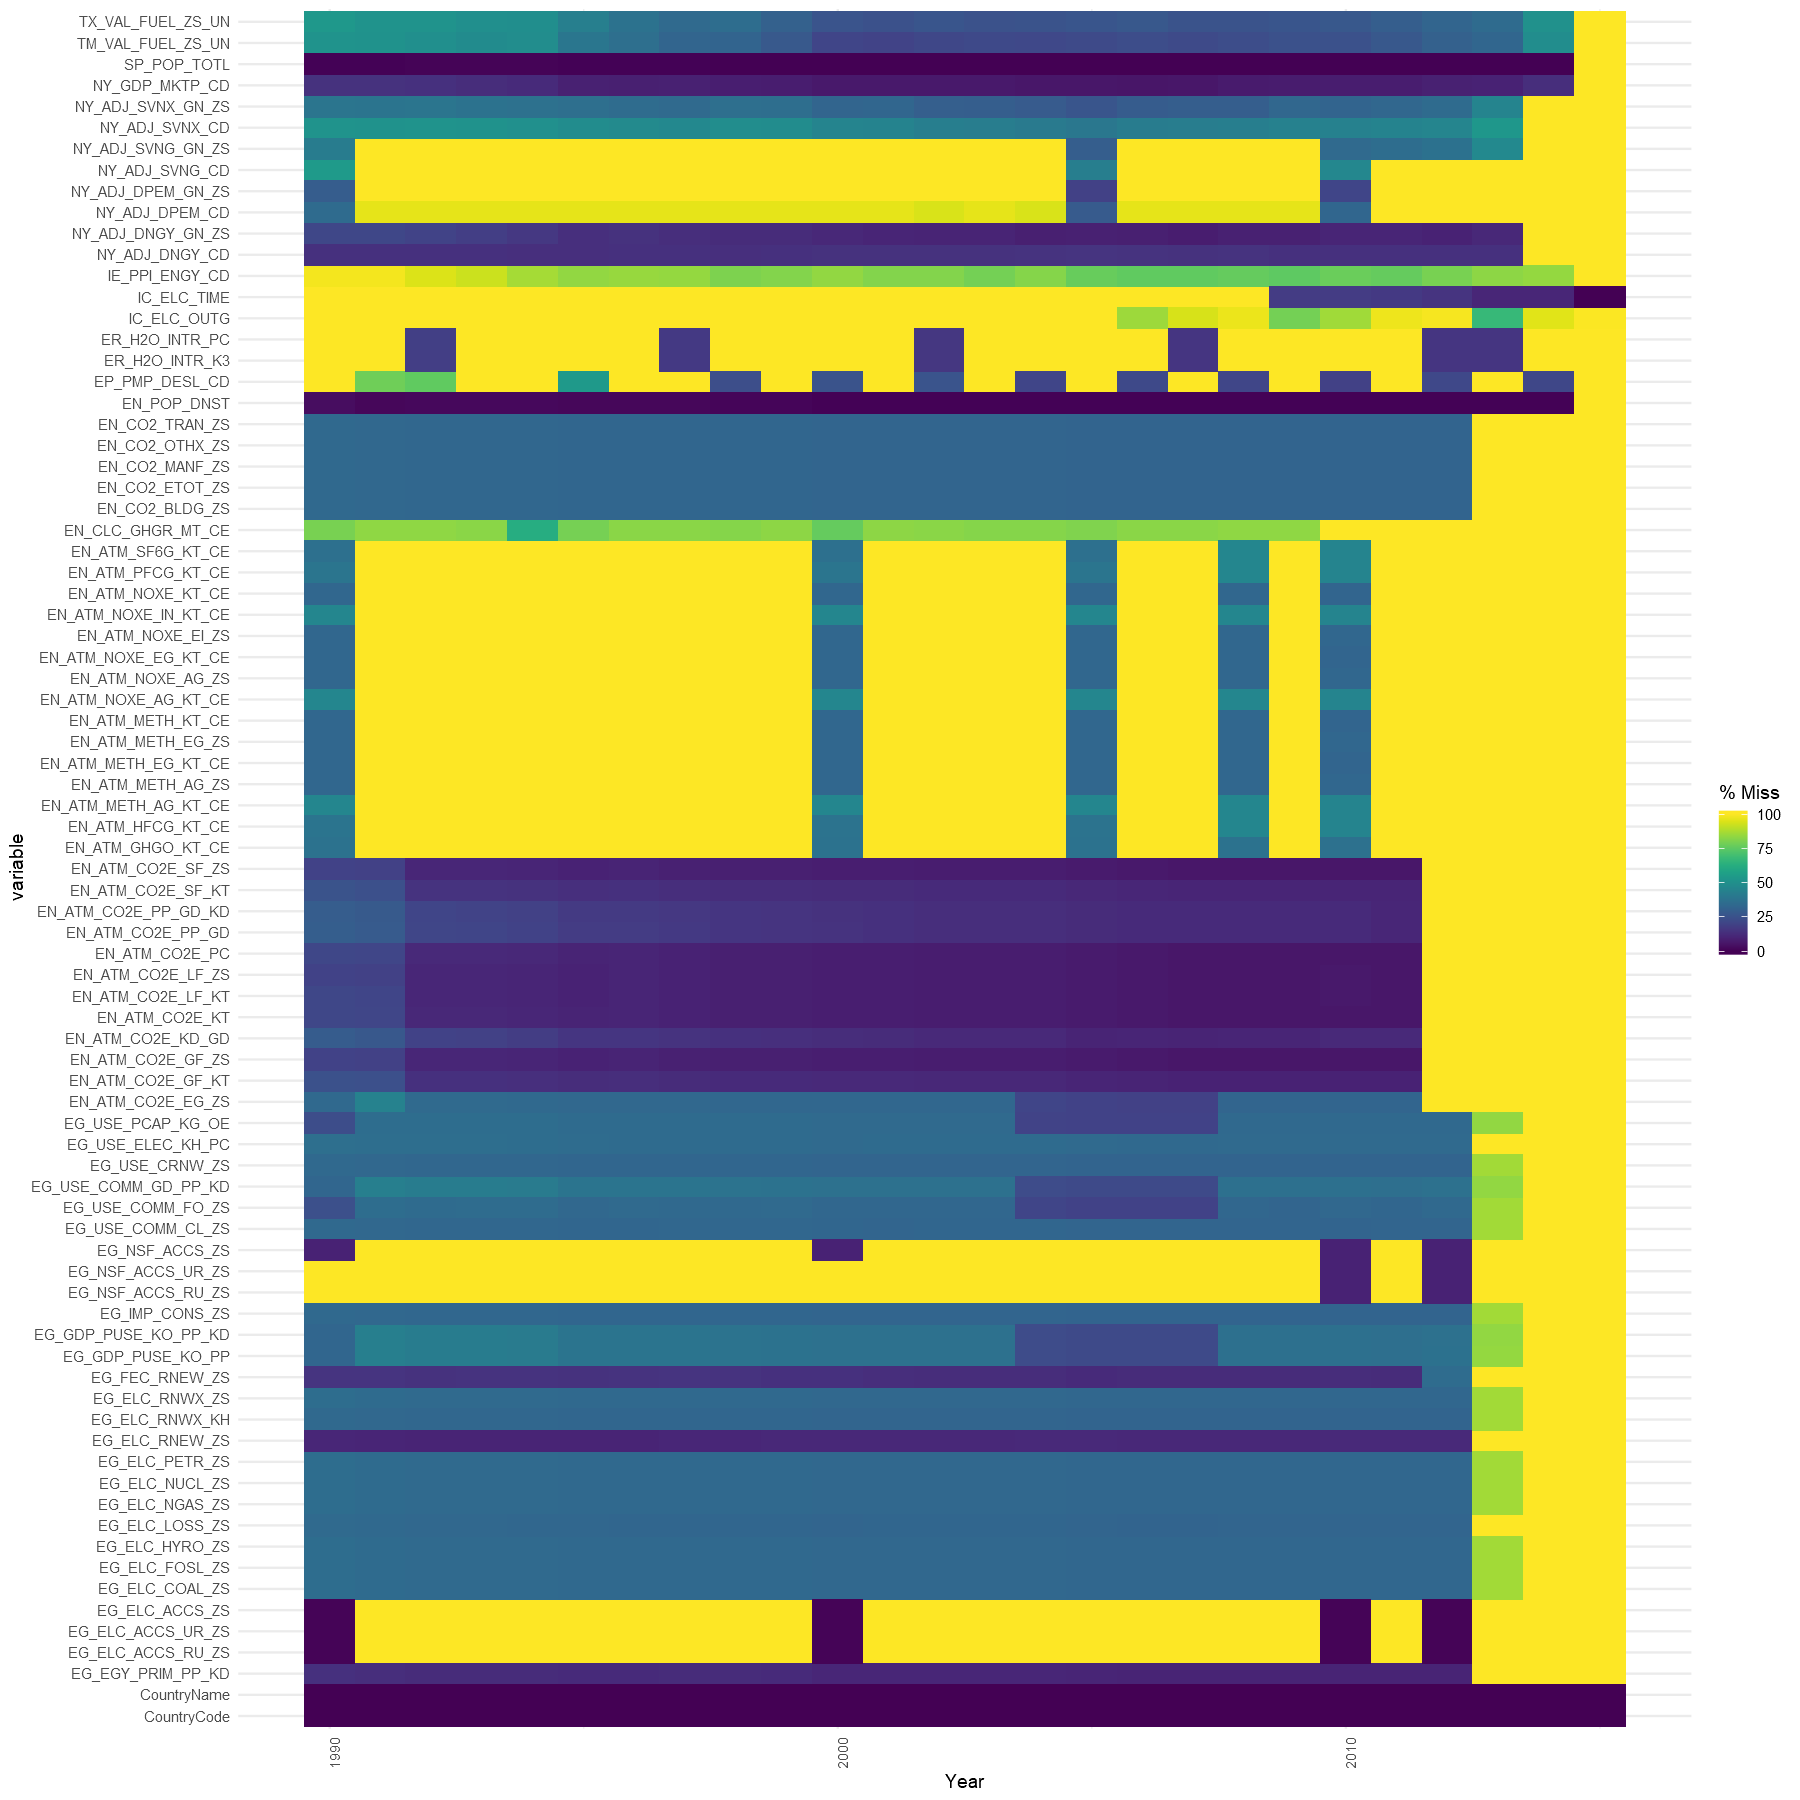

In [8]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=df90, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=8))

In [117]:
dfCNT <- df %>% group_by('CountryName') %>% summarise()


CountryName,CountryCode,Year,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,...,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE,"""CountryName"""
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Afghanistan,AFG,1960,8994793,NA,NA,NA,NA,NA,NA,...,NA,30.97345,NA,NA,NA,NA,NA,NA,NA,CountryName
Afghanistan,AFG,1961,9164945,NA,NA,NA,NA,NA,NA,...,NA,35.82090,NA,NA,14.03815,NA,NA,NA,NA,CountryName
Afghanistan,AFG,1962,9343772,NA,NA,NA,47.15,NA,NA,...,NA,43.08511,NA,NA,14.31206,NA,NA,NA,NA,CountryName
Afghanistan,AFG,1963,9531555,NA,NA,NA,NA,NA,NA,...,NA,37.30570,NA,NA,14.59969,NA,NA,NA,NA,CountryName
Afghanistan,AFG,1964,9728645,NA,NA,NA,NA,NA,NA,...,NA,35.80786,NA,NA,14.90158,NA,NA,NA,NA,CountryName
Afghanistan,AFG,1965,9935358,NA,NA,NA,NA,NA,NA,...,NA,37.81818,NA,NA,15.21821,NA,NA,NA,NA,CountryName
Afghanistan,AFG,1966,10148841,NA,NA,NA,NA,NA,NA,...,NA,39.26174,NA,NA,15.54520,NA,NA,NA,NA,CountryName
Afghanistan,AFG,1967,10368600,NA,NA,NA,47.15,NA,NA,...,NA,31.14286,NA,NA,15.88181,NA,NA,NA,NA,CountryName
Afghanistan,AFG,1968,10599790,NA,NA,NA,NA,NA,NA,...,NA,27.24551,NA,NA,16.23593,NA,NA,NA,NA,CountryName


In [28]:
if (!require("VIM")) install.packages("VIM")

Loading required package: VIM

Loading required package: colorspace

Loading required package: grid

Loading required package: data.table

Warning message:
"package 'data.table' was built under R version 3.6.2"

Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.


Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

    sleep




In [29]:
df.na <- df
for(i in names(df[,4:82])) {
    df.na[,i] <- ifelse(is.na(df.na[,i])==T,1,0)
}
head(df.na)

,CountryName,CountryCode,Year,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,AFG,1960,0,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
2,Afghanistan,AFG,1961,0,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
3,Afghanistan,AFG,1962,0,1,1,1,0,1,1,...,1,1,0,1,1,0,1,1,1,1
4,Afghanistan,AFG,1963,0,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
5,Afghanistan,AFG,1964,0,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
6,Afghanistan,AFG,1965,0,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1


In [30]:
heatmap(as.matrix(df.na),cexCol = 1, cexRow = 1, col=brewer.pal(n=ncol(df), name="RdYlBu"))

ERROR: Error in heatmap(as.matrix(df.na), cexCol = 1, cexRow = 1, col = brewer.pal(n = ncol(df), : 'x' must be a numeric matrix


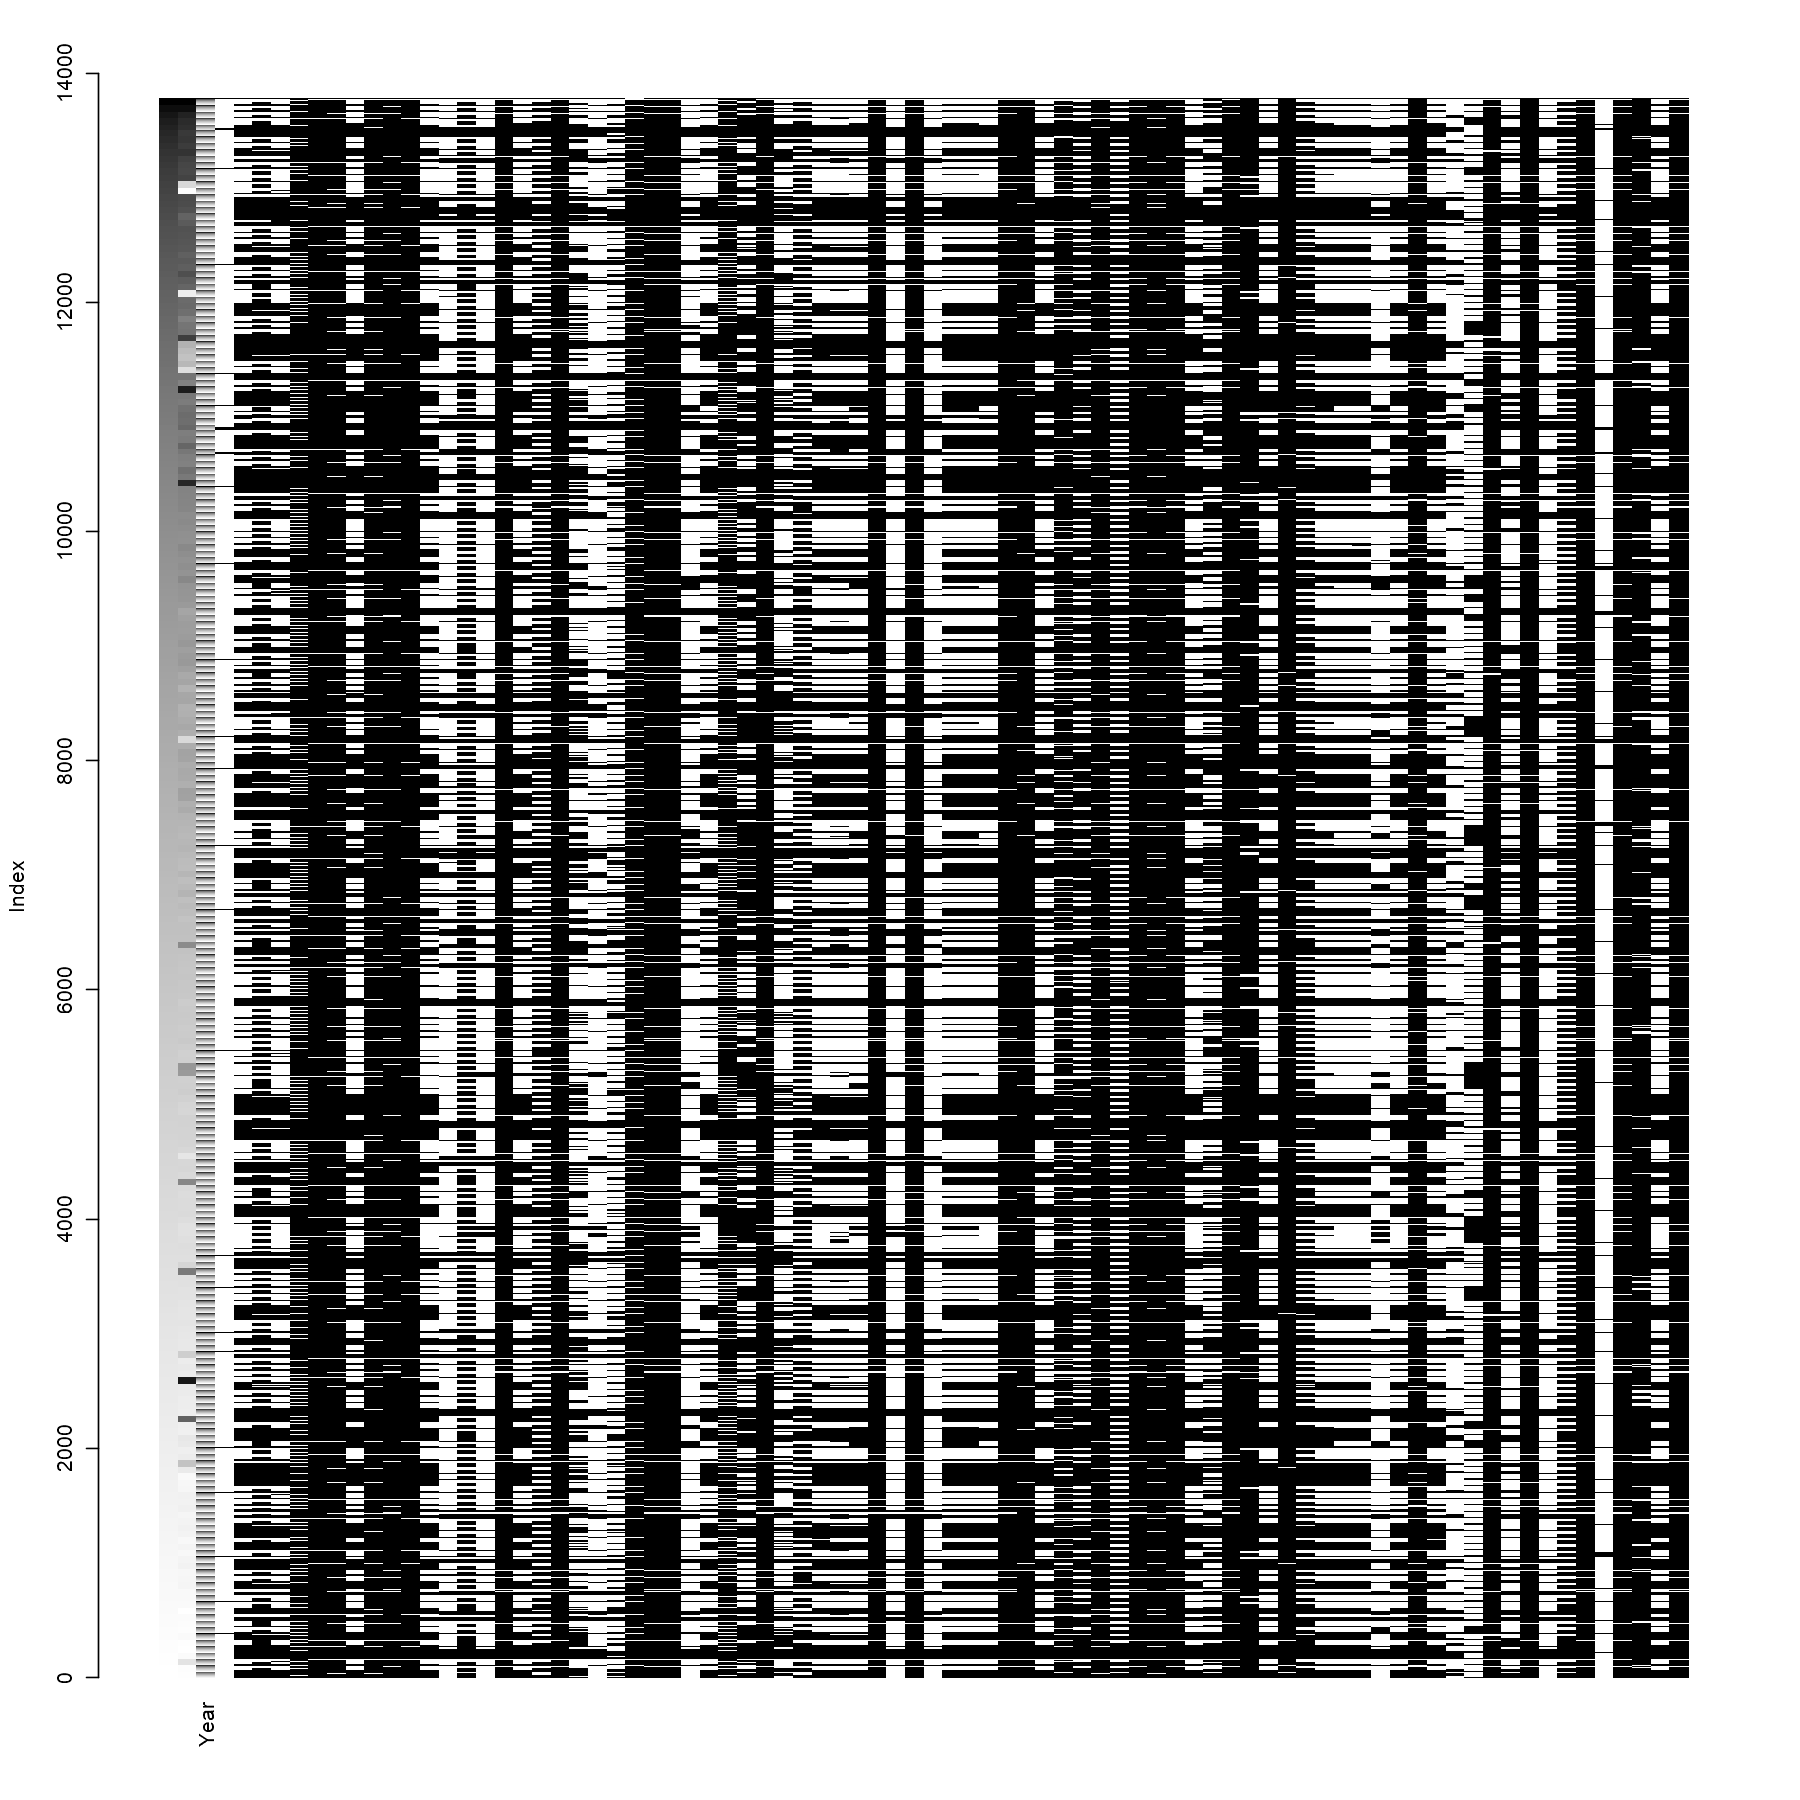

In [31]:
matrixplot(as.matrix(df.na))

In [32]:
getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [17]:
getMissingness(df)

[[1]]
                    var na.count rate
1           IC_ELC_OUTG    13531 98.2
2        NY_ADJ_SVNG_CD    13390 97.2
3     EG_NSF_ACCS_UR_ZS    13330 96.7
4     EG_NSF_ACCS_RU_ZS    13330 96.7
5     NY_ADJ_DPEM_GN_ZS    13206 95.8
6  EN_ATM_NOXE_AG_KT_CE    13106 95.1
7  EN_ATM_METH_AG_KT_CE    13106 95.1
8  EN_ATM_NOXE_IN_KT_CE    13106 95.1
9        NY_ADJ_DPEM_CD    13100 95.1
10    EN_ATM_PFCG_KT_CE    13055 94.8

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 13778 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
IC_ELC_OUTG,13531,98.2
NY_ADJ_SVNG_CD,13390,97.2
EG_NSF_ACCS_UR_ZS,13330,96.7
EG_NSF_ACCS_RU_ZS,13330,96.7
NY_ADJ_DPEM_GN_ZS,13206,95.8
EN_ATM_NOXE_AG_KT_CE,13106,95.1
EN_ATM_METH_AG_KT_CE,13106,95.1
EN_ATM_NOXE_IN_KT_CE,13106,95.1
NY_ADJ_DPEM_CD,13100,95.1


In [96]:
#missing - less than 40%
missing_less_40_pct <- function (data, getRows = FALSE) {
       l <- nrow(data)
      vn <- names(data)
    nadf <- data
     cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(rate < 
        40)
    }
na_less_40_pct <-missing_less_40_pct(df)
na_less_40_pct

var,na.count,rate
<fct>,<dbl>,<dbl>
NY_ADJ_DNGY_GN_ZS,5151,37.4
EN_ATM_CO2E_KD_GD,5055,36.7
NY_ADJ_DNGY_CD,4405,32.0
EN_ATM_CO2E_GF_KT,3774,27.4
EN_ATM_CO2E_SF_KT,3708,26.9
NY_GDP_MKTP_CD,3432,24.9
EN_ATM_CO2E_LF_KT,3195,23.2
EN_ATM_CO2E_PC,3179,23.1
EN_ATM_CO2E_KT,3176,23.1


In [112]:
na_less_40_pct70 <-missing_less_40_pct(df70)
na_less_40_pct70

var,na.count,rate
<fct>,<dbl>,<dbl>
EN_ATM_CO2E_KD_GD,3700,32.6
EN_ATM_CO2E_SF_KT,3000,26.5
EN_ATM_CO2E_GF_KT,2979,26.3
NY_ADJ_DNGY_GN_ZS,2709,23.9
EN_ATM_CO2E_LF_KT,2584,22.8
EN_ATM_CO2E_PC,2570,22.7
EN_ATM_CO2E_KT,2567,22.6
EN_ATM_CO2E_LF_ZS,2477,21.9
EN_ATM_CO2E_GF_ZS,2472,21.8


In [113]:
na_less_40_pct90 <-missing_less_40_pct(df90)
na_less_40_pct90

var,na.count,rate
<fct>,<dbl>,<dbl>
EN_CO2_OTHX_ZS,2542,39.7
EN_CO2_MANF_ZS,2542,39.7
EN_CO2_ETOT_ZS,2542,39.7
EN_CO2_TRAN_ZS,2542,39.7
EN_CO2_BLDG_ZS,2542,39.7
EG_USE_COMM_CL_ZS,2522,39.4
EG_IMP_CONS_ZS,2508,39.2
EG_ELC_RNWX_KH,2508,39.2
EG_USE_CRNW_ZS,2508,39.2


In [88]:
dfUSA <- df[df$CountryCode == 'USA',]
dfUSA70 <- dfUSA[dfUSA$Year >= 1970,]
dfUSA90 <- dfUSA[dfUSA$Year >= 1990,]

In [89]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),c("CountryName",'CountryCode','Year'))
    missdata <- data.frame(CountryName=data$CountryName)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missingUSA <- missingMatrix(data=dfUSA)
head(df_missingUSA)

,CountryName,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,EG_ELC_NUCL_ZS,EG_ELC_ACCS_RU_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,United States,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,1,1,1,0,1
2,United States,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
3,United States,0,0,1,0,0,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
4,United States,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
5,United States,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
6,United States,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1


In [93]:
df_missingUSA70 <- missingMatrix(data=dfUSA70)
head(df_missingUSA70)

,CountryName,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,EG_ELC_NUCL_ZS,EG_ELC_ACCS_RU_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,United States,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
2,United States,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
3,United States,0,0,1,0,0,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
4,United States,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
5,United States,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
6,United States,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1


In [92]:
df_missingUSA90 <- missingMatrix(data=dfUSA90)
head(df_missingUSA90)

,CountryName,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,EG_ELC_NUCL_ZS,EG_ELC_ACCS_RU_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,United States,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,United States,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,1,0,1
3,United States,0,0,0,0,0,1,1,0,1,...,0,1,0,0,1,0,1,1,0,1
4,United States,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,1,0,1
5,United States,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,1,0,1
6,United States,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,1,0,1


Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


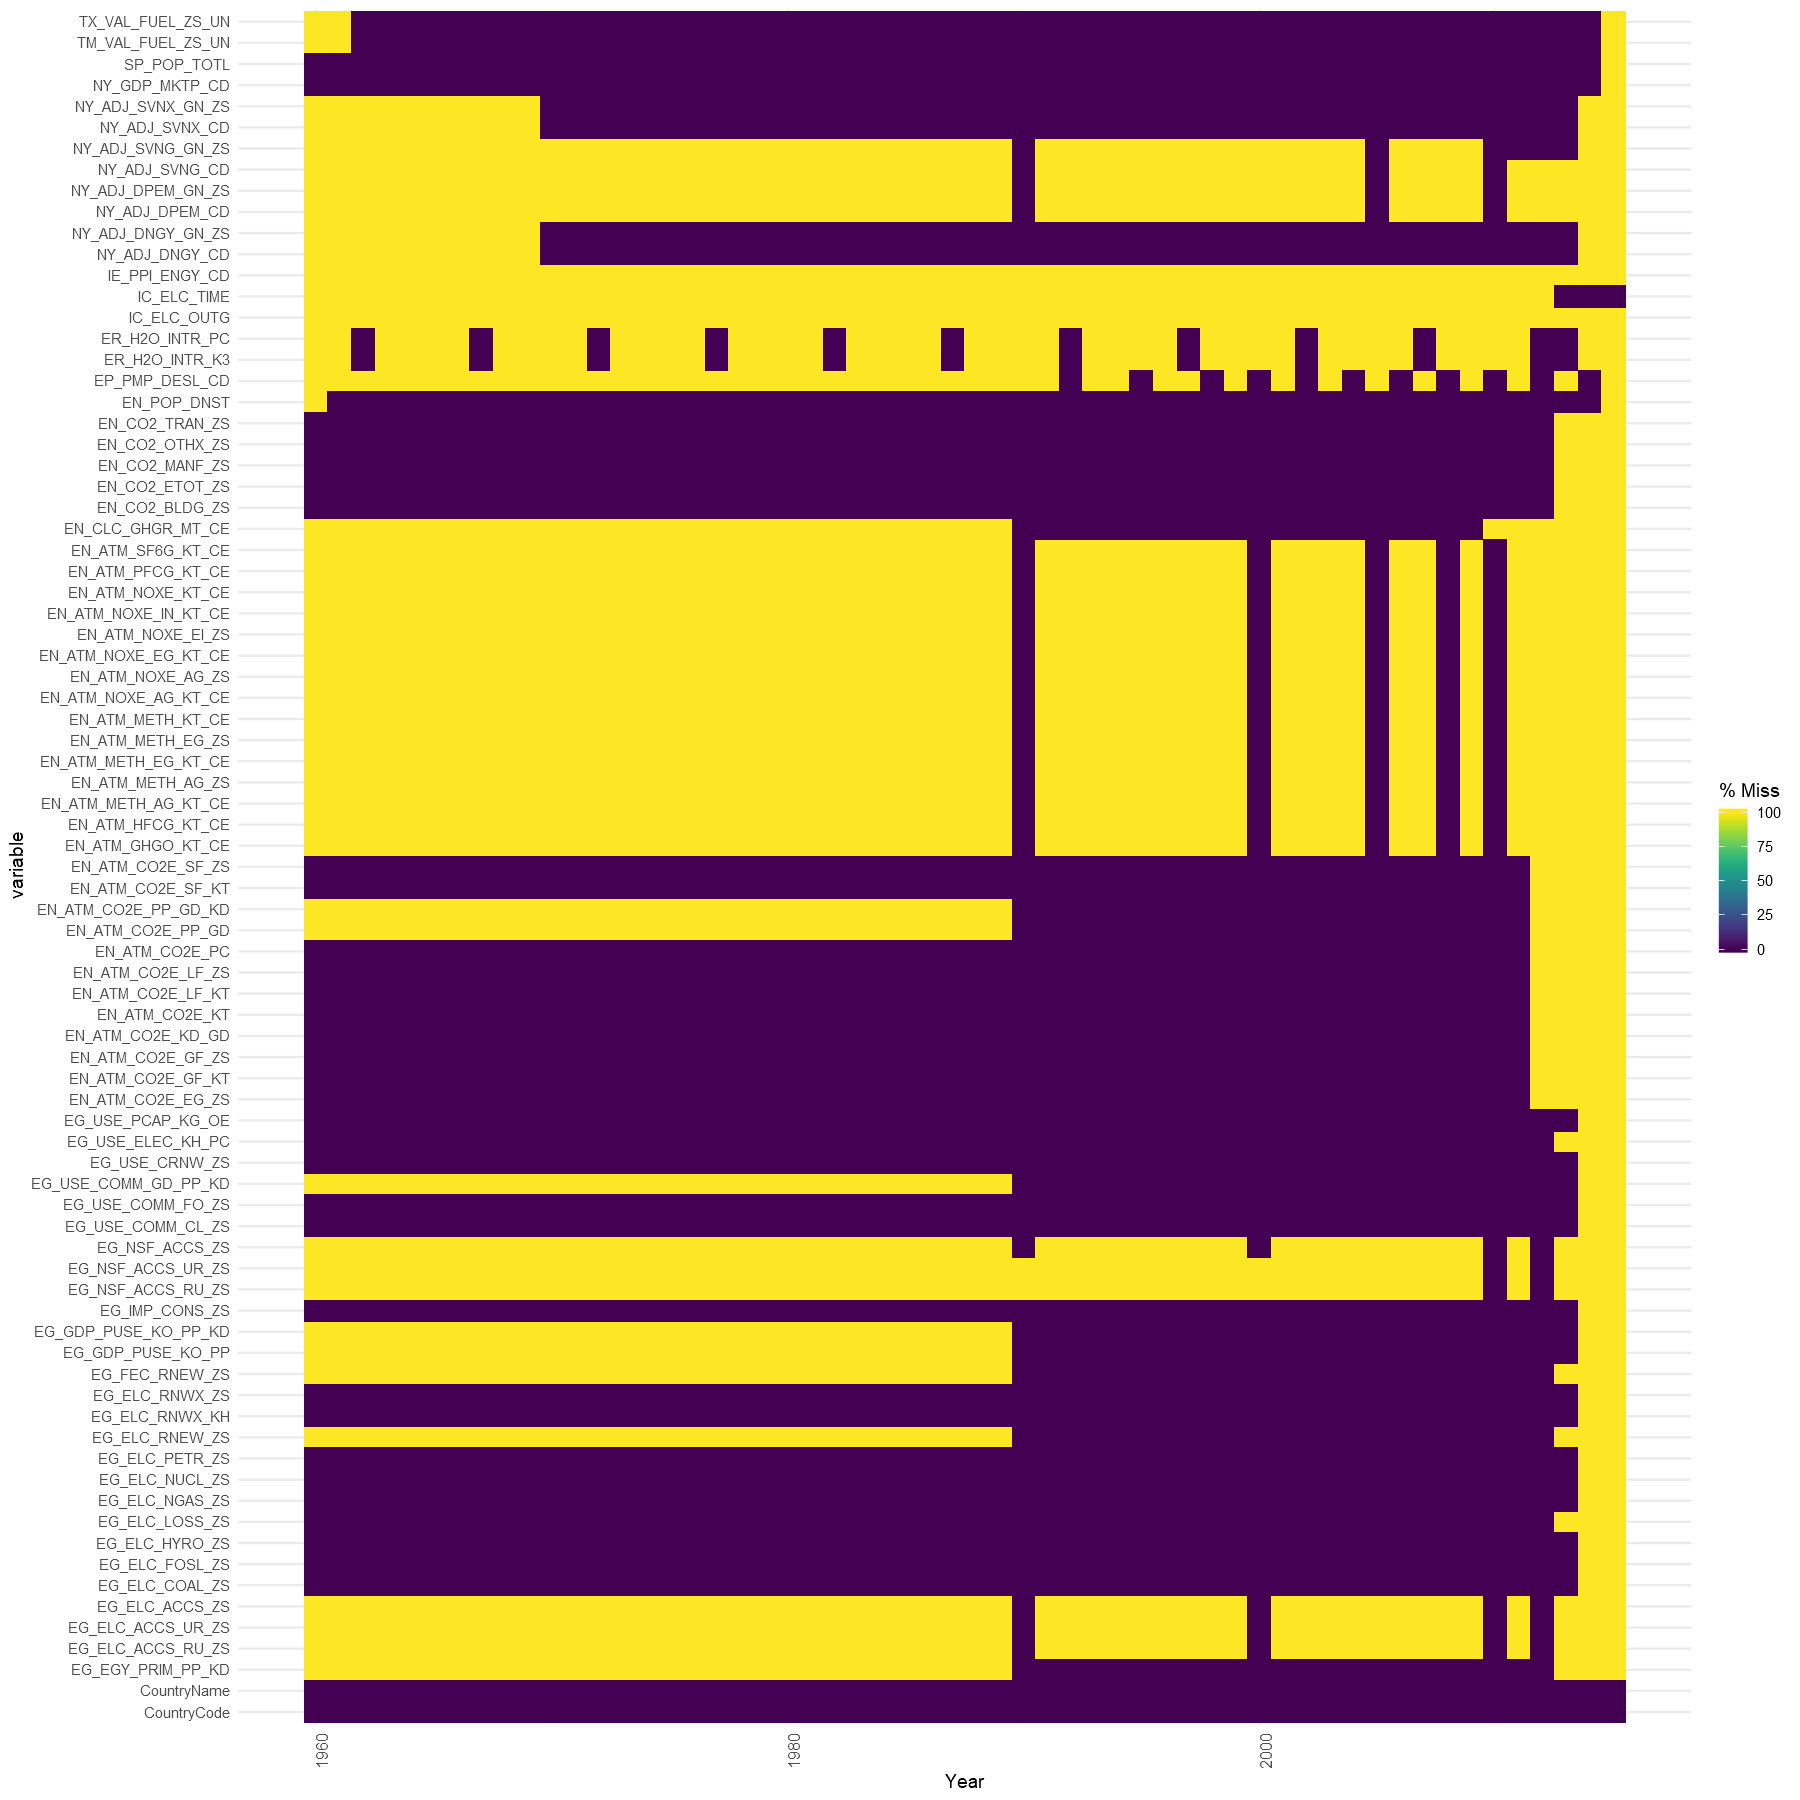

In [21]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
#options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=dfUSA, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=10))

Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


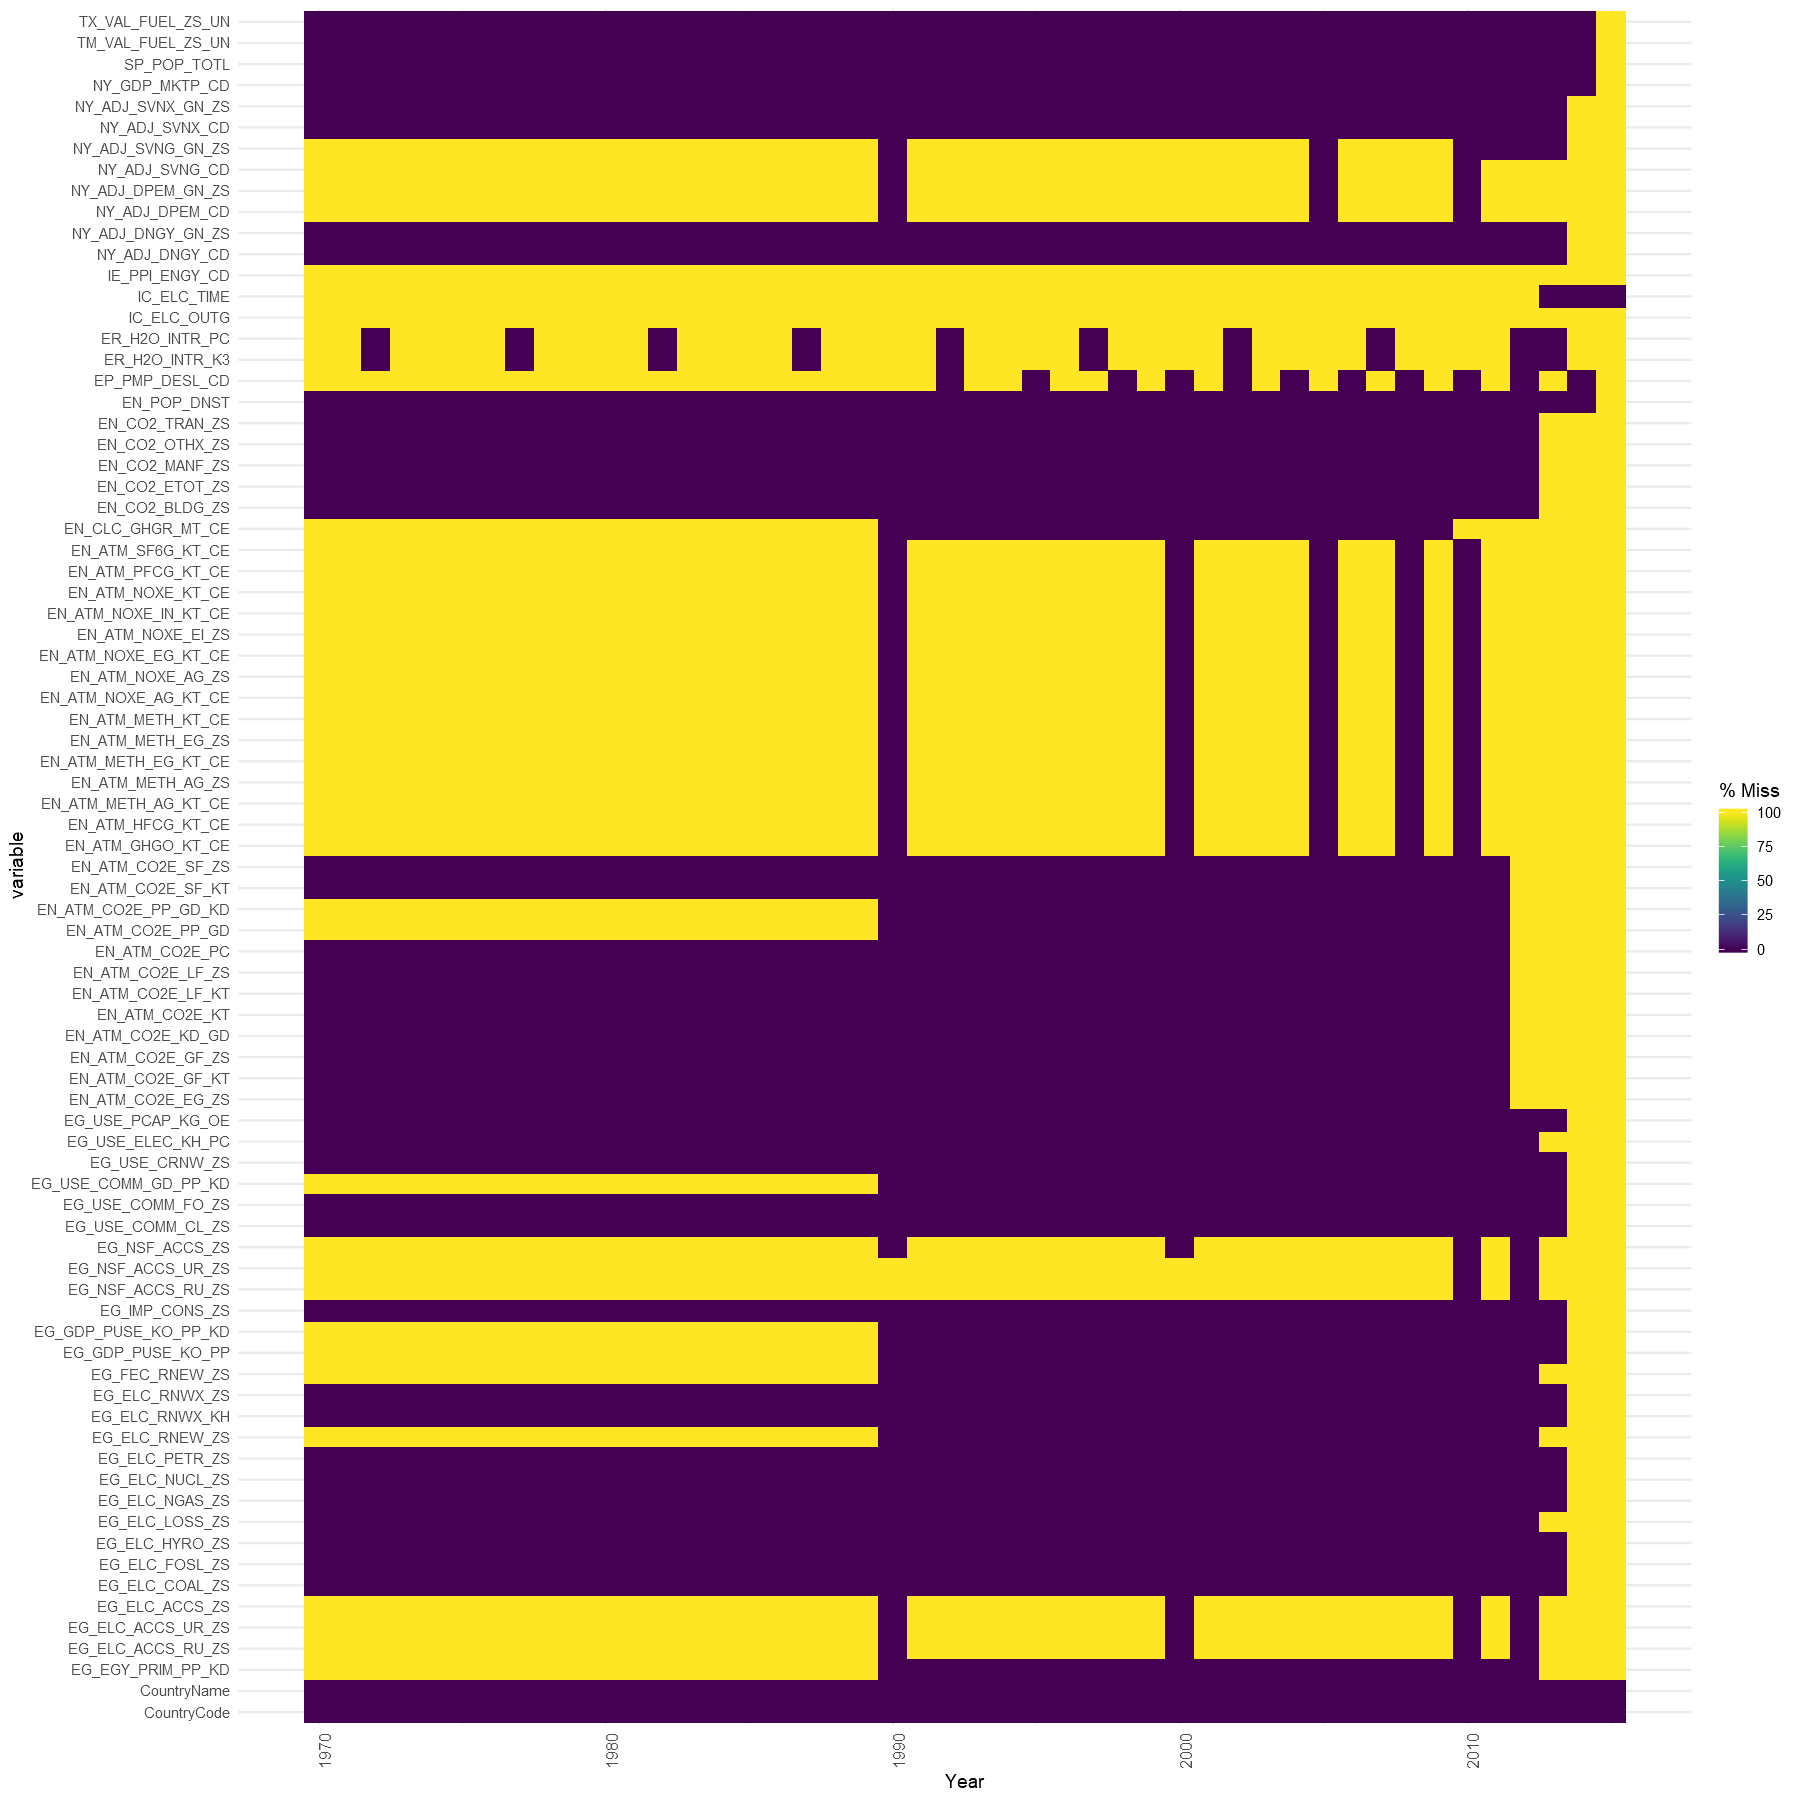

In [94]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
#options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=dfUSA70, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=10))

Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


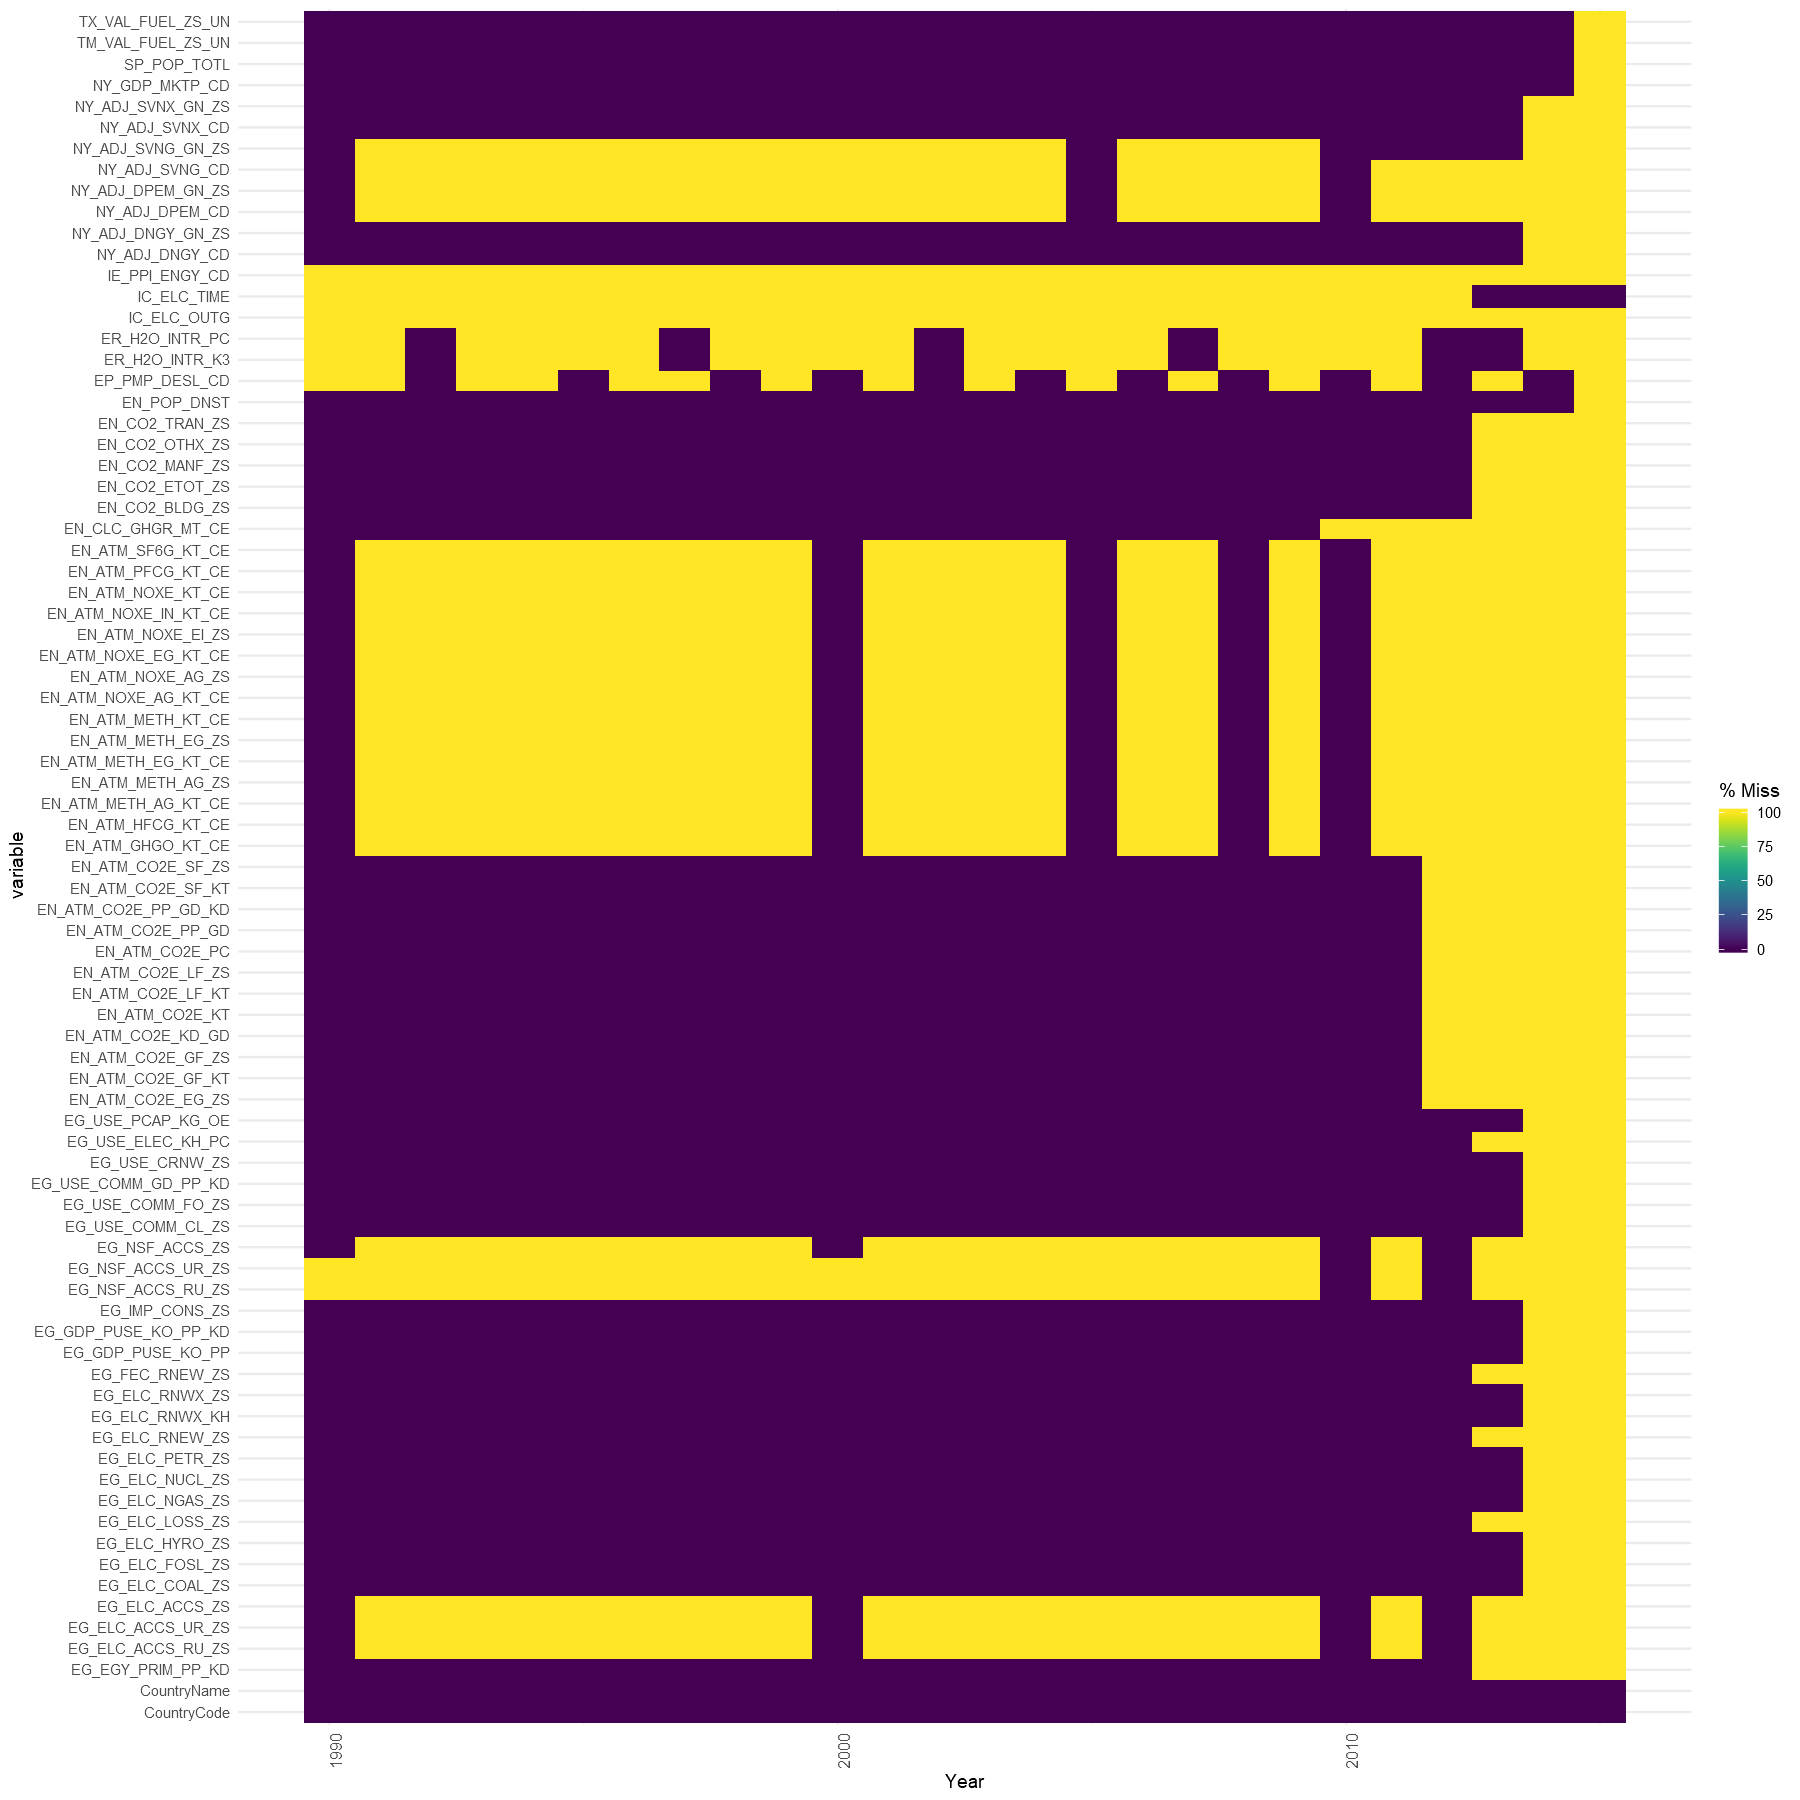

In [95]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
#options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=dfUSA90, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=10))

In [36]:
getMissingness(dfUSA)

[[1]]
                 var na.count  rate
1        IC_ELC_OUTG       56 100.0
2     IE_PPI_ENGY_CD       56 100.0
3  EG_NSF_ACCS_UR_ZS       54  96.4
4  EG_NSF_ACCS_RU_ZS       54  96.4
5        IC_ELC_TIME       53  94.6
6  NY_ADJ_DPEM_GN_ZS       53  94.6
7     NY_ADJ_DPEM_CD       53  94.6
8     NY_ADJ_SVNG_CD       53  94.6
9     EG_NSF_ACCS_ZS       52  92.9
10 EG_ELC_ACCS_RU_ZS       52  92.9

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 56 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
IC_ELC_OUTG,56,100.0
IE_PPI_ENGY_CD,56,100.0
EG_NSF_ACCS_UR_ZS,54,96.4
EG_NSF_ACCS_RU_ZS,54,96.4
IC_ELC_TIME,53,94.6
NY_ADJ_DPEM_GN_ZS,53,94.6
NY_ADJ_DPEM_CD,53,94.6
NY_ADJ_SVNG_CD,53,94.6
EG_NSF_ACCS_ZS,52,92.9


In [97]:
na_less_40_pct_USA <-missing_less_40_pct(dfUSA)
na_less_40_pct_USA

var,na.count,rate
<fct>,<dbl>,<dbl>
NY_ADJ_DNGY_GN_ZS,12,21.4
NY_ADJ_SVNX_CD,12,21.4
NY_ADJ_SVNX_GN_ZS,12,21.4
NY_ADJ_DNGY_CD,12,21.4
EN_ATM_CO2E_GF_ZS,4,7.1
EN_ATM_CO2E_KT,4,7.1
EN_ATM_CO2E_LF_KT,4,7.1
EN_ATM_CO2E_GF_KT,4,7.1
EN_ATM_CO2E_EG_ZS,4,7.1


In [98]:
getMissingness(dfUSA70)

[[1]]
                 var na.count  rate
1        IC_ELC_OUTG       46 100.0
2     IE_PPI_ENGY_CD       46 100.0
3  EG_NSF_ACCS_UR_ZS       44  95.7
4  EG_NSF_ACCS_RU_ZS       44  95.7
5        IC_ELC_TIME       43  93.5
6  NY_ADJ_DPEM_GN_ZS       43  93.5
7     NY_ADJ_DPEM_CD       43  93.5
8     NY_ADJ_SVNG_CD       43  93.5
9     EG_NSF_ACCS_ZS       42  91.3
10 EG_ELC_ACCS_RU_ZS       42  91.3

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 46 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
IC_ELC_OUTG,46,100.0
IE_PPI_ENGY_CD,46,100.0
EG_NSF_ACCS_UR_ZS,44,95.7
EG_NSF_ACCS_RU_ZS,44,95.7
IC_ELC_TIME,43,93.5
NY_ADJ_DPEM_GN_ZS,43,93.5
NY_ADJ_DPEM_CD,43,93.5
NY_ADJ_SVNG_CD,43,93.5
EG_NSF_ACCS_ZS,42,91.3


In [100]:
na_less_40_pct_USA70 <-missing_less_40_pct(dfUSA70)
na_less_40_pct_USA70

var,na.count,rate
<fct>,<dbl>,<dbl>
EN_ATM_CO2E_GF_ZS,4,8.7
EN_ATM_CO2E_KT,4,8.7
EN_ATM_CO2E_LF_KT,4,8.7
EN_ATM_CO2E_GF_KT,4,8.7
EN_ATM_CO2E_EG_ZS,4,8.7
EN_ATM_CO2E_PC,4,8.7
EN_ATM_CO2E_LF_ZS,4,8.7
EN_ATM_CO2E_SF_KT,4,8.7
EN_ATM_CO2E_KD_GD,4,8.7


In [101]:
na_less_40_pct_USA90 <-missing_less_40_pct(dfUSA90)
na_less_40_pct_USA90

var,na.count,rate
<fct>,<dbl>,<dbl>
EN_CLC_GHGR_MT_CE,6,23.1
EN_ATM_CO2E_GF_ZS,4,15.4
EN_ATM_CO2E_PP_GD,4,15.4
EN_ATM_CO2E_KT,4,15.4
EN_ATM_CO2E_LF_KT,4,15.4
EN_ATM_CO2E_GF_KT,4,15.4
EN_ATM_CO2E_EG_ZS,4,15.4
EN_ATM_CO2E_PC,4,15.4
EN_ATM_CO2E_LF_ZS,4,15.4


In [59]:
dfCHN <-df[df$CountryCode == "CHN",]
dfCHN70 <-dfCHN[dfCHN$Year >= 1970,]
dfCHN90 <-dfCHN[dfCHN$Year >= 1990,]

In [40]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),c("CountryName",'CountryCode','Year'))
    missdata <- data.frame(CountryName=data$CountryName)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missingCHN <- missingMatrix(data=dfCHN)
head(df_missingCHN)

,CountryName,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,EG_ELC_NUCL_ZS,EG_ELC_ACCS_RU_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,China,0,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,1
2,China,0,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,1,1,1
3,China,0,1,1,1,0,1,1,1,1,...,0,1,0,1,1,0,1,1,1,1
4,China,0,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,1,1,1
5,China,0,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,1,1,1
6,China,0,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,1,1,1


In [56]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),c("CountryName",'CountryCode','Year'))
    missdata <- data.frame(CountryName=data$CountryName)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missingCHN70 <- missingMatrix(data=dfCHN70)
head(df_missingCHN70)

,CountryName,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,EG_ELC_NUCL_ZS,EG_ELC_ACCS_RU_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,China,0,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,1,1,1
2,China,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
3,China,0,0,1,0,0,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
4,China,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
5,China,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
6,China,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1


In [60]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),c("CountryName",'CountryCode','Year'))
    missdata <- data.frame(CountryName=data$CountryName)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missingCHN90 <- missingMatrix(data=dfCHN90)
head(df_missingCHN90)

,CountryName,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,EG_ELC_NUCL_ZS,EG_ELC_ACCS_RU_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,China,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,China,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,1,0,1
3,China,0,0,0,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,China,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1
5,China,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1
6,China,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1


Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


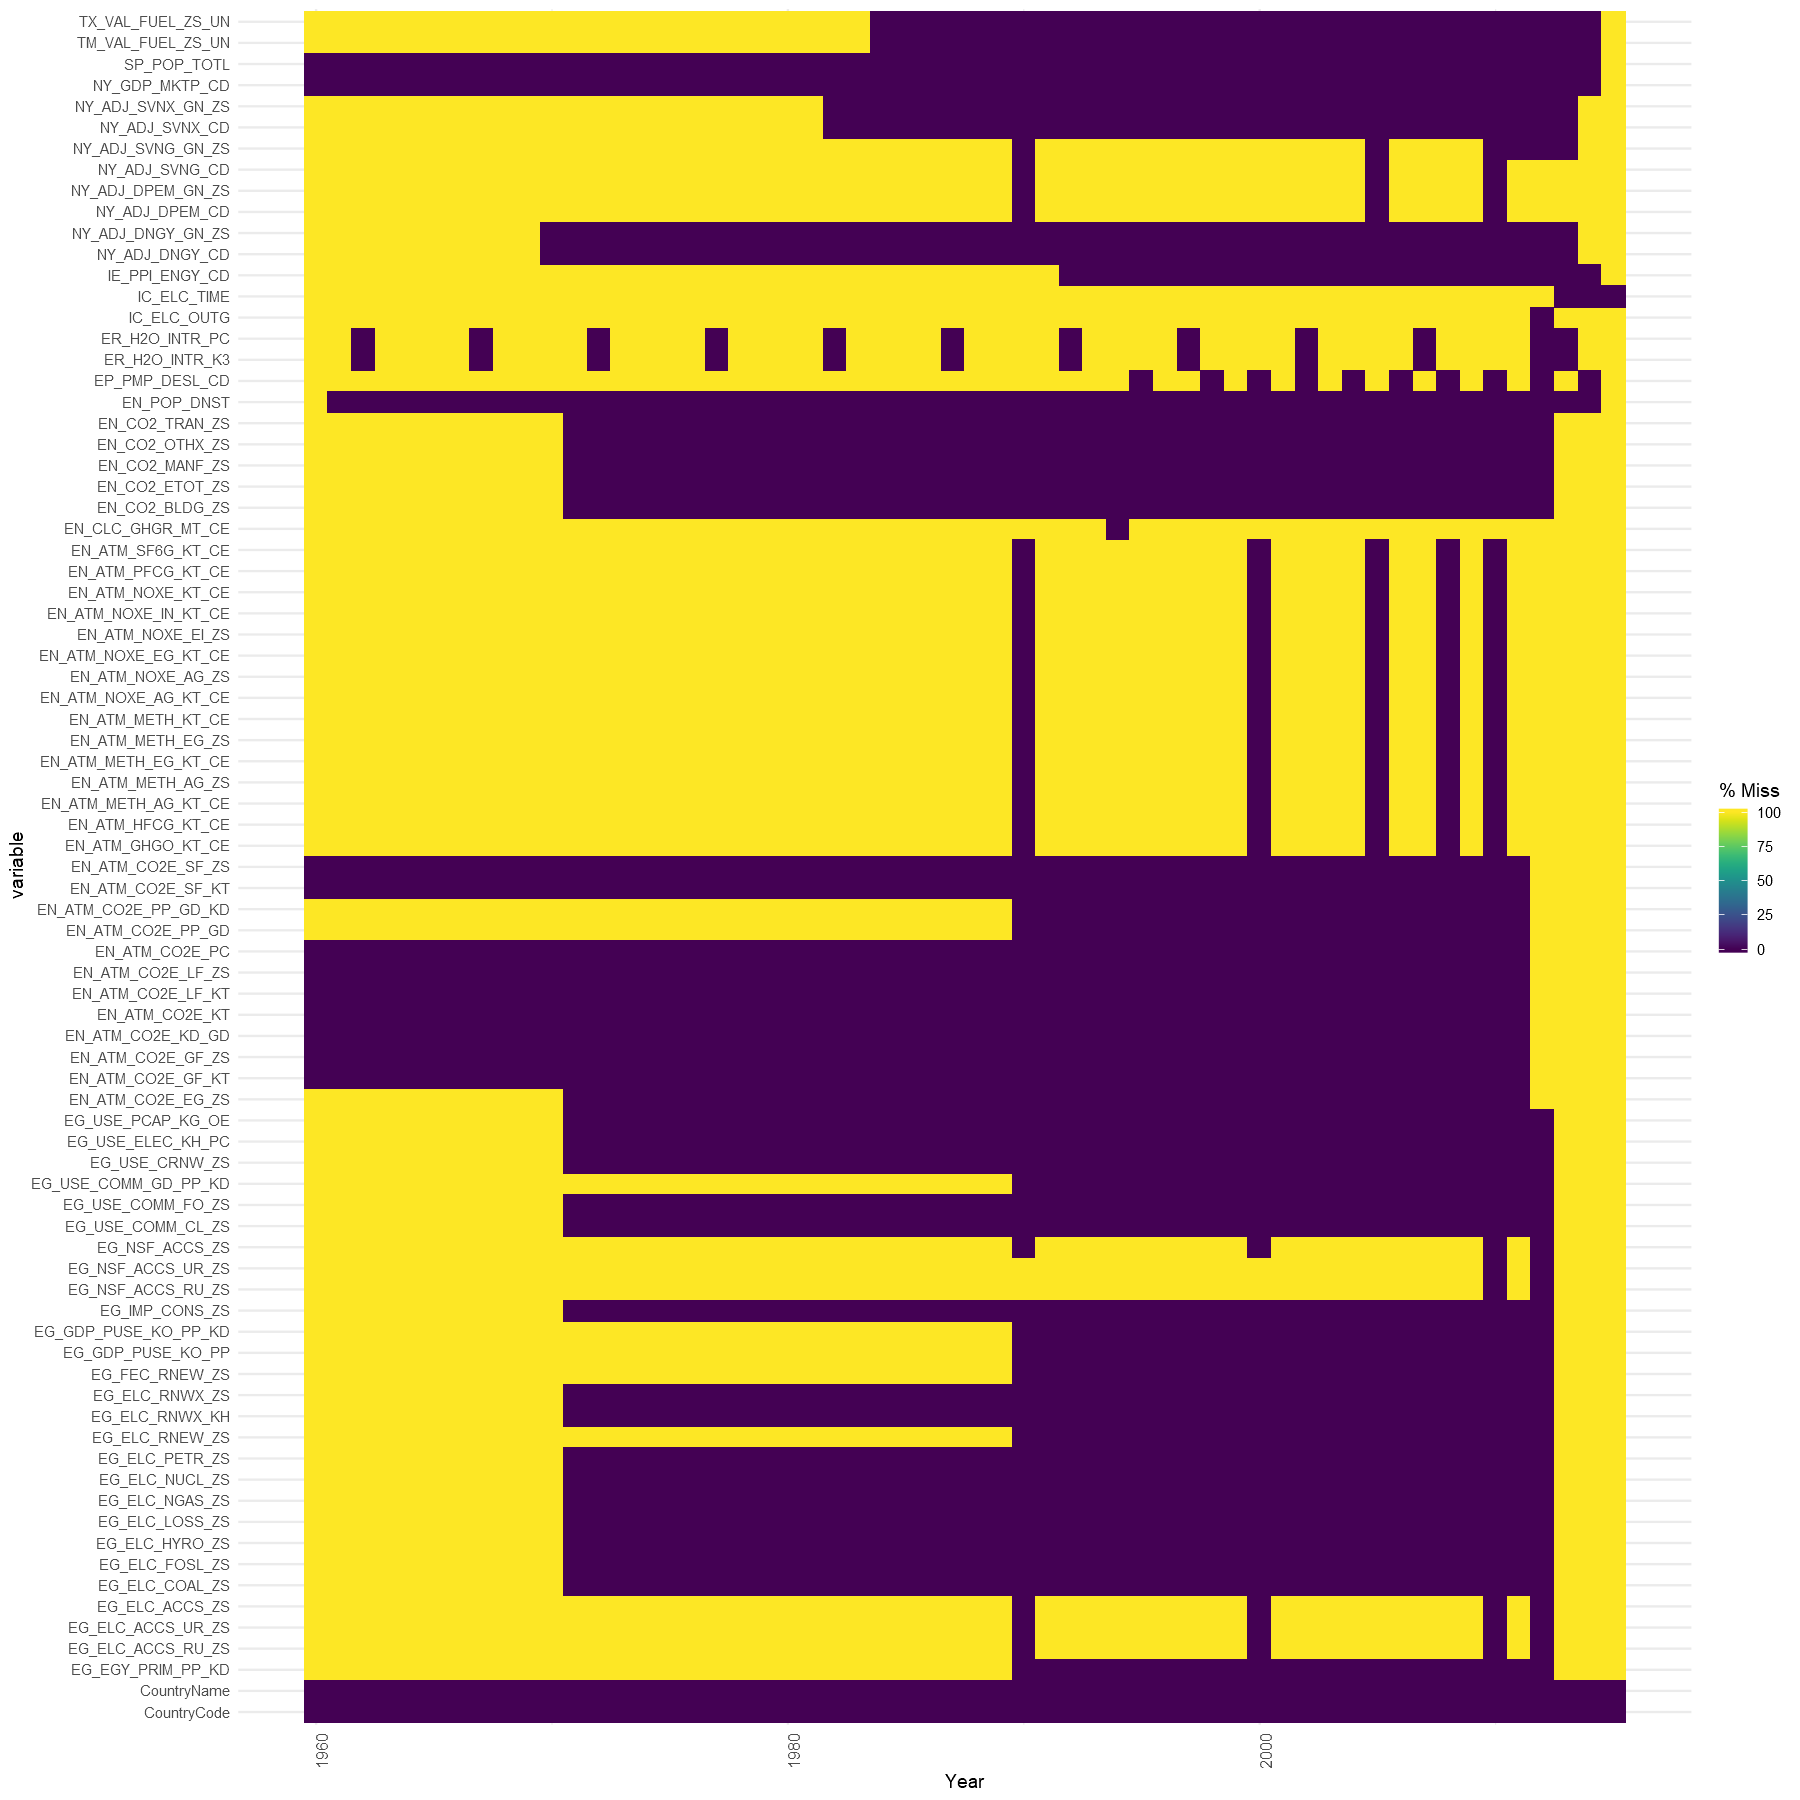

In [61]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
#options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=dfCHN, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=10))

Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


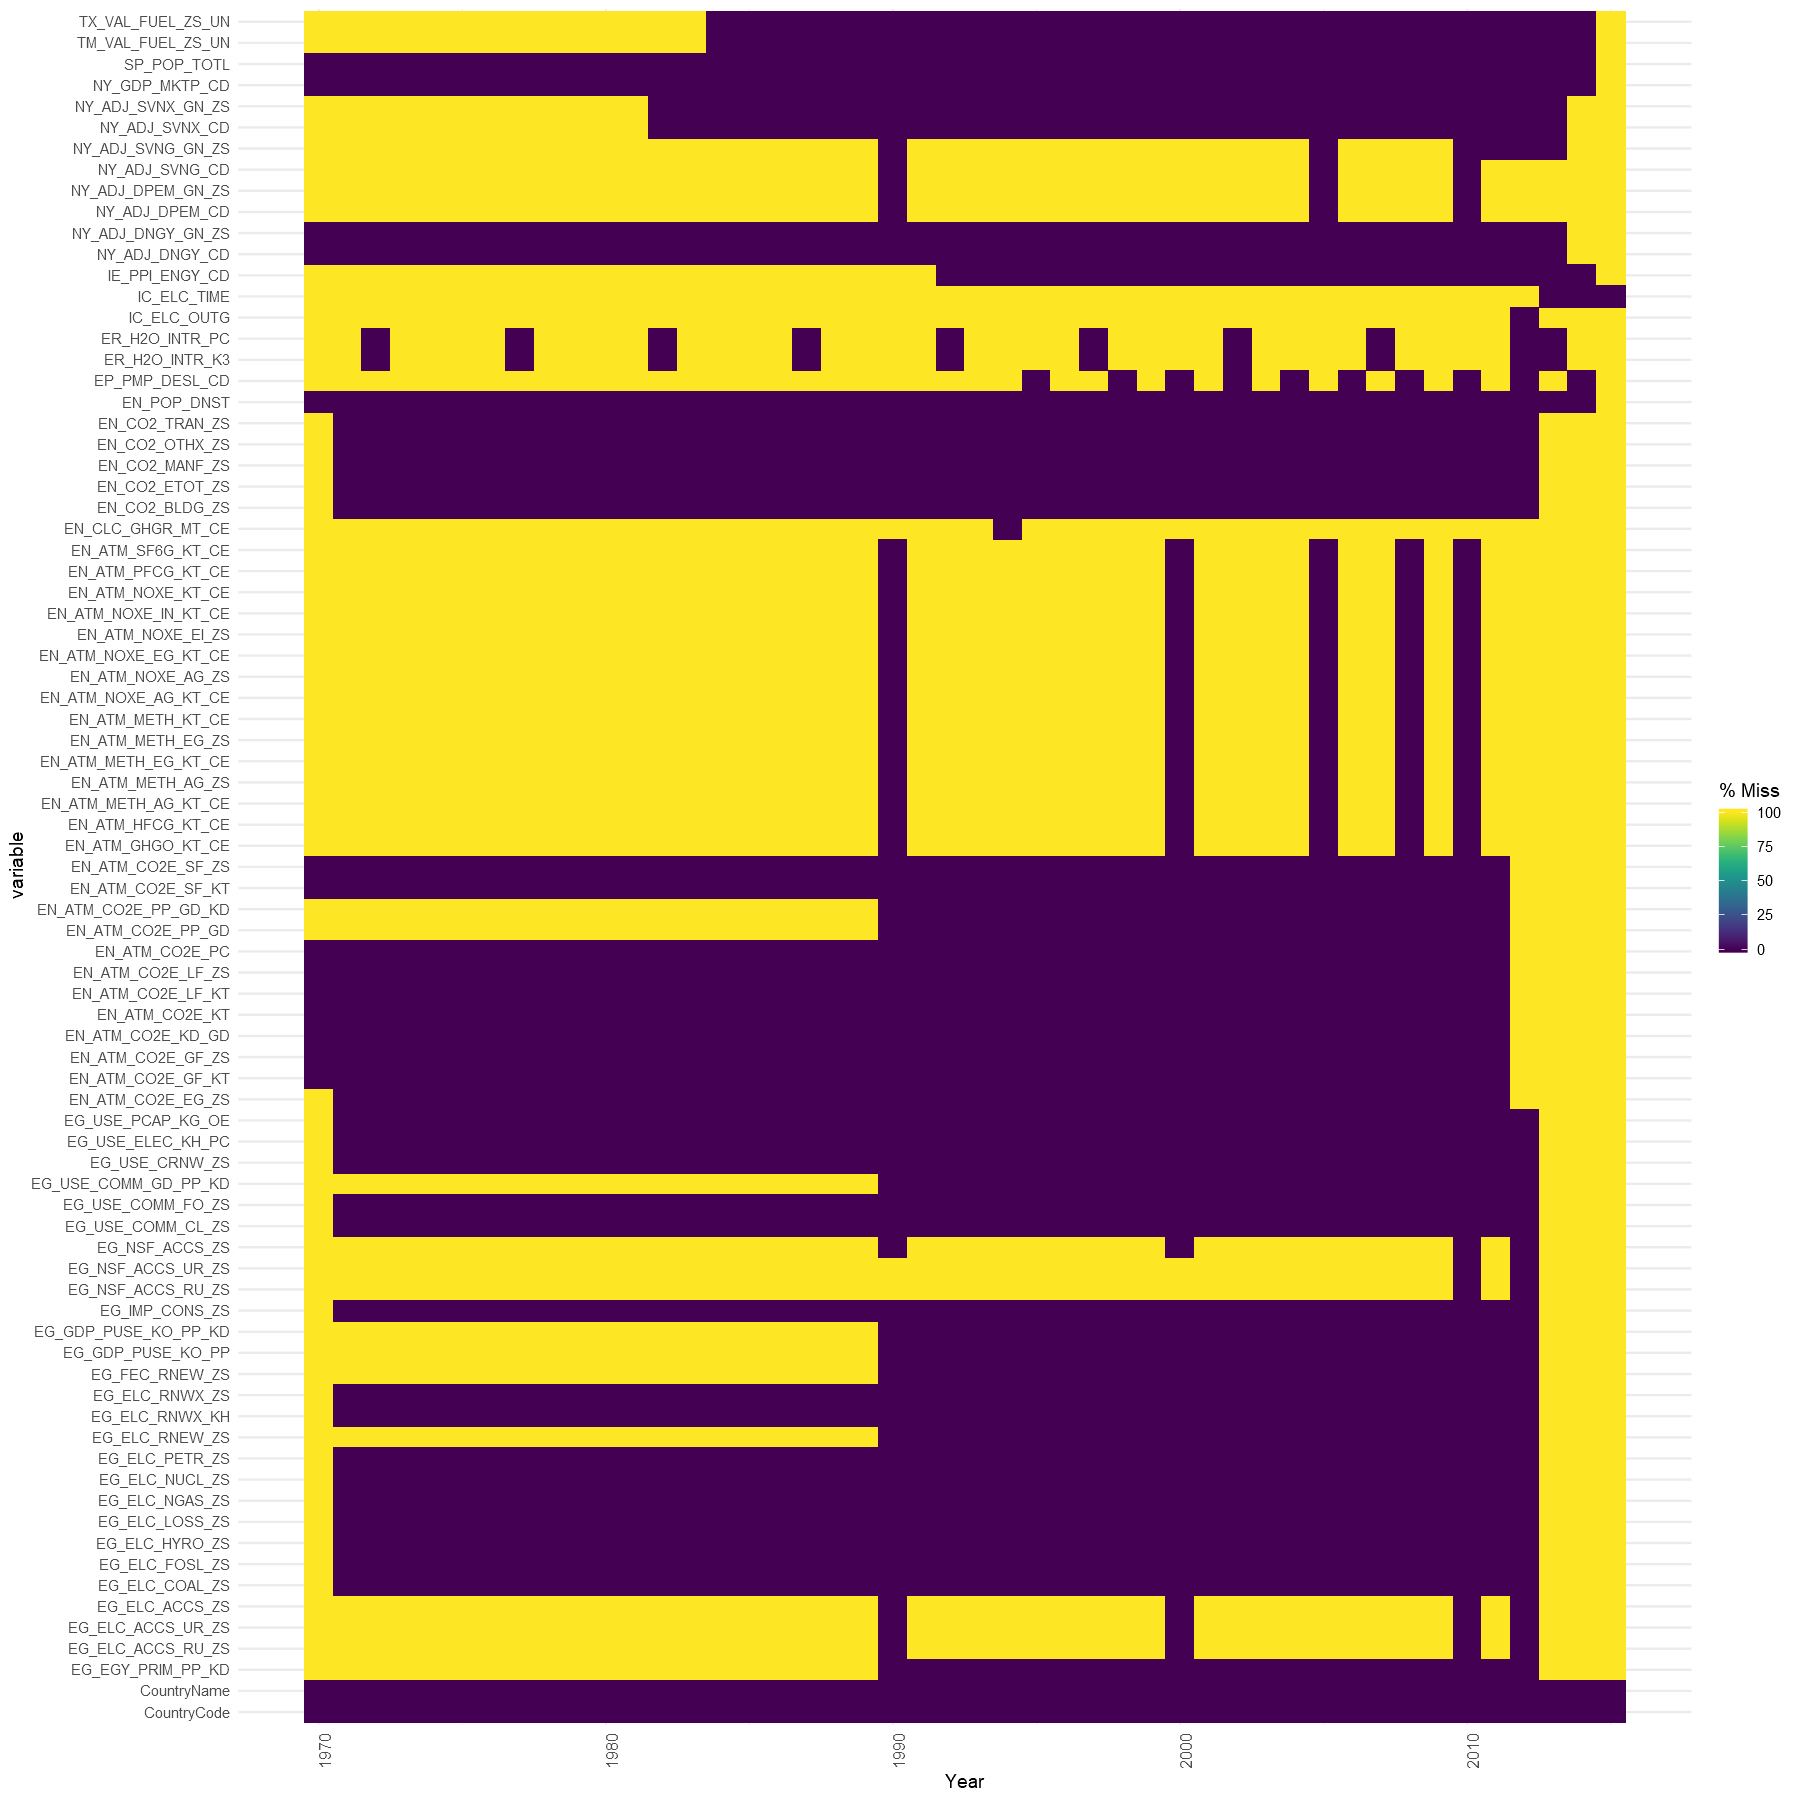

In [62]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
#options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=dfCHN70, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=10))

Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


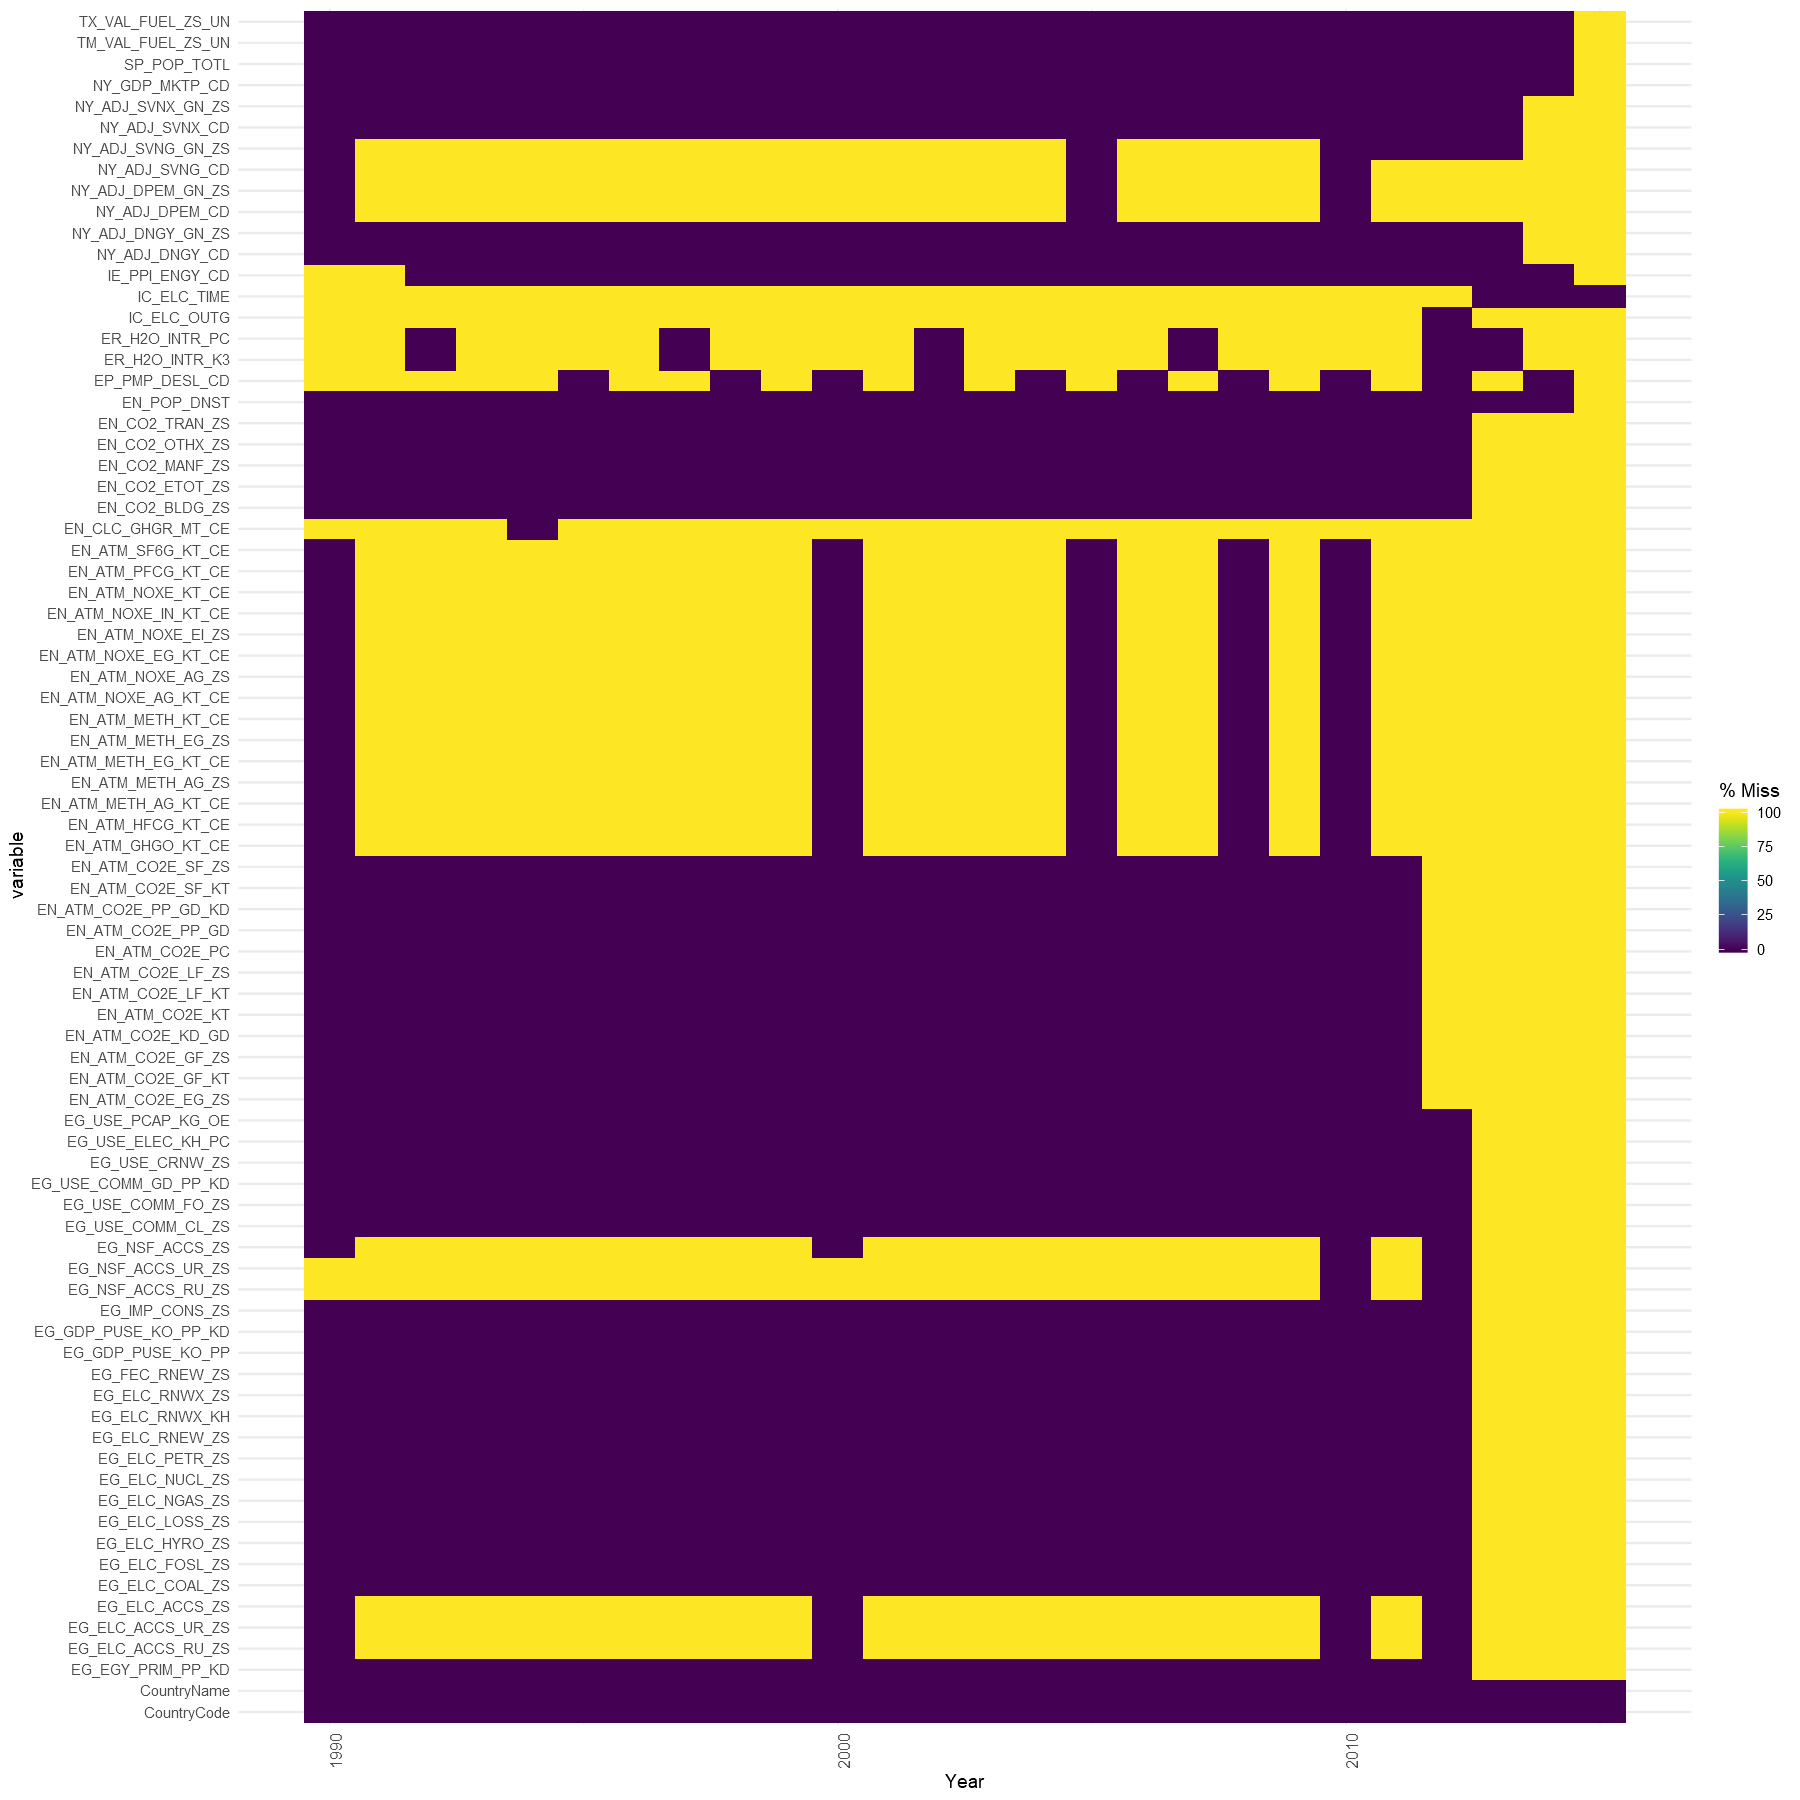

In [63]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
#options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=dfCHN90, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=10))

In [42]:
getMissingness(dfCHN)

[[1]]
                 var na.count rate
1  EN_CLC_GHGR_MT_CE       55 98.2
2        IC_ELC_OUTG       55 98.2
3  EG_NSF_ACCS_UR_ZS       54 96.4
4  EG_NSF_ACCS_RU_ZS       54 96.4
5        IC_ELC_TIME       53 94.6
6  NY_ADJ_DPEM_GN_ZS       53 94.6
7     NY_ADJ_DPEM_CD       53 94.6
8     NY_ADJ_SVNG_CD       53 94.6
9     EG_NSF_ACCS_ZS       52 92.9
10 EG_ELC_ACCS_RU_ZS       52 92.9

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 56 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
EN_CLC_GHGR_MT_CE,55,98.2
IC_ELC_OUTG,55,98.2
EG_NSF_ACCS_UR_ZS,54,96.4
EG_NSF_ACCS_RU_ZS,54,96.4
IC_ELC_TIME,53,94.6
NY_ADJ_DPEM_GN_ZS,53,94.6
NY_ADJ_DPEM_CD,53,94.6
NY_ADJ_SVNG_CD,53,94.6
EG_NSF_ACCS_ZS,52,92.9


In [102]:
na_less_40_pct_CHN <-missing_less_40_pct(dfCHN)
na_less_40_pct_CHN

var,na.count,rate
<fct>,<dbl>,<dbl>
EN_ATM_CO2E_EG_ZS,15,26.8
EN_CO2_OTHX_ZS,14,25.0
EG_USE_COMM_FO_ZS,14,25.0
EG_ELC_NUCL_ZS,14,25.0
EG_IMP_CONS_ZS,14,25.0
EG_ELC_FOSL_ZS,14,25.0
EN_CO2_MANF_ZS,14,25.0
EG_ELC_LOSS_ZS,14,25.0
EG_USE_PCAP_KG_OE,14,25.0


In [58]:
getMissingness(dfCHN70)

[[1]]
                 var na.count rate
1  EN_CLC_GHGR_MT_CE       45 97.8
2        IC_ELC_OUTG       45 97.8
3  EG_NSF_ACCS_UR_ZS       44 95.7
4  EG_NSF_ACCS_RU_ZS       44 95.7
5        IC_ELC_TIME       43 93.5
6  NY_ADJ_DPEM_GN_ZS       43 93.5
7     NY_ADJ_DPEM_CD       43 93.5
8     NY_ADJ_SVNG_CD       43 93.5
9     EG_NSF_ACCS_ZS       42 91.3
10 EG_ELC_ACCS_RU_ZS       42 91.3

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 46 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
EN_CLC_GHGR_MT_CE,45,97.8
IC_ELC_OUTG,45,97.8
EG_NSF_ACCS_UR_ZS,44,95.7
EG_NSF_ACCS_RU_ZS,44,95.7
IC_ELC_TIME,43,93.5
NY_ADJ_DPEM_GN_ZS,43,93.5
NY_ADJ_DPEM_CD,43,93.5
NY_ADJ_SVNG_CD,43,93.5
EG_NSF_ACCS_ZS,42,91.3


In [103]:
na_less_40_pct_CHN70 <-missing_less_40_pct(dfCHN70)
na_less_40_pct_CHN70

var,na.count,rate
<fct>,<dbl>,<dbl>
TX_VAL_FUEL_ZS_UN,15,32.6
TM_VAL_FUEL_ZS_UN,15,32.6
NY_ADJ_SVNX_CD,14,30.4
NY_ADJ_SVNX_GN_ZS,14,30.4
EN_ATM_CO2E_EG_ZS,5,10.9
EN_CO2_OTHX_ZS,4,8.7
EG_USE_COMM_FO_ZS,4,8.7
EG_ELC_NUCL_ZS,4,8.7
EG_IMP_CONS_ZS,4,8.7


In [64]:
getMissingness(dfCHN90)

[[1]]
                 var na.count rate
1  EN_CLC_GHGR_MT_CE       25 96.2
2        IC_ELC_OUTG       25 96.2
3  EG_NSF_ACCS_UR_ZS       24 92.3
4  EG_NSF_ACCS_RU_ZS       24 92.3
5        IC_ELC_TIME       23 88.5
6  NY_ADJ_DPEM_GN_ZS       23 88.5
7     NY_ADJ_DPEM_CD       23 88.5
8     NY_ADJ_SVNG_CD       23 88.5
9     EG_NSF_ACCS_ZS       22 84.6
10 EG_ELC_ACCS_RU_ZS       22 84.6

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 26 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
EN_CLC_GHGR_MT_CE,25,96.2
IC_ELC_OUTG,25,96.2
EG_NSF_ACCS_UR_ZS,24,92.3
EG_NSF_ACCS_RU_ZS,24,92.3
IC_ELC_TIME,23,88.5
NY_ADJ_DPEM_GN_ZS,23,88.5
NY_ADJ_DPEM_CD,23,88.5
NY_ADJ_SVNG_CD,23,88.5
EG_NSF_ACCS_ZS,22,84.6


In [104]:
na_less_40_pct_CHN90 <-missing_less_40_pct(dfCHN90)
na_less_40_pct_CHN90

var,na.count,rate
<fct>,<dbl>,<dbl>
EN_ATM_CO2E_GF_ZS,4,15.4
EN_ATM_CO2E_PP_GD,4,15.4
EN_ATM_CO2E_KT,4,15.4
EN_ATM_CO2E_LF_KT,4,15.4
EN_ATM_CO2E_GF_KT,4,15.4
EN_ATM_CO2E_EG_ZS,4,15.4
EN_ATM_CO2E_PC,4,15.4
EN_ATM_CO2E_LF_ZS,4,15.4
EN_ATM_CO2E_SF_KT,4,15.4


In [65]:
dfDEU <-df[df$CountryCode == "DEU",]
dfDEU70 <-dfDEU[dfDEU$Year >= 1970,]
dfDEU90 <-dfDEU[dfDEU$Year >= 1990,]

In [66]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),c("CountryName",'CountryCode','Year'))
    missdata <- data.frame(CountryName=data$CountryName)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missingCHN90 <- missingMatrix(data=dfCHN90)
head(df_missingCHN)

,CountryName,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,EG_ELC_NUCL_ZS,EG_ELC_ACCS_RU_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
2,Afghanistan,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
3,Afghanistan,0,1,1,1,0,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
4,Afghanistan,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
5,Afghanistan,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
6,Afghanistan,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1


In [67]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),c("CountryName",'CountryCode','Year'))
    missdata <- data.frame(CountryName=data$CountryName)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missingCHN90 <- missingMatrix(data=dfCHN90)
head(df_missingCHN70)

,CountryName,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,EG_ELC_NUCL_ZS,EG_ELC_ACCS_RU_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,China,0,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,1,1,1
2,China,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
3,China,0,0,1,0,0,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
4,China,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
5,China,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1
6,China,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,1


In [68]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),c("CountryName",'CountryCode','Year'))
    missdata <- data.frame(CountryName=data$CountryName)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missingCHN90 <- missingMatrix(data=dfCHN90)
head(df_missingCHN90)

,CountryName,SP_POP_TOTL,EN_CO2_OTHX_ZS,EG_USE_COMM_GD_PP_KD,EG_USE_COMM_FO_ZS,ER_H2O_INTR_K3,EG_NSF_ACCS_UR_ZS,EG_NSF_ACCS_ZS,EG_ELC_NUCL_ZS,EG_ELC_ACCS_RU_ZS,...,EN_ATM_CO2E_KD_GD,NY_ADJ_SVNG_CD,EN_ATM_CO2E_SF_ZS,EN_ATM_CO2E_PP_GD_KD,EN_ATM_NOXE_IN_KT_CE,EN_POP_DNST,EN_ATM_NOXE_EG_KT_CE,IE_PPI_ENGY_CD,EN_CO2_BLDG_ZS,EN_ATM_SF6G_KT_CE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,China,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,China,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,1,0,1
3,China,0,0,0,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,China,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1
5,China,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1
6,China,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,1


Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


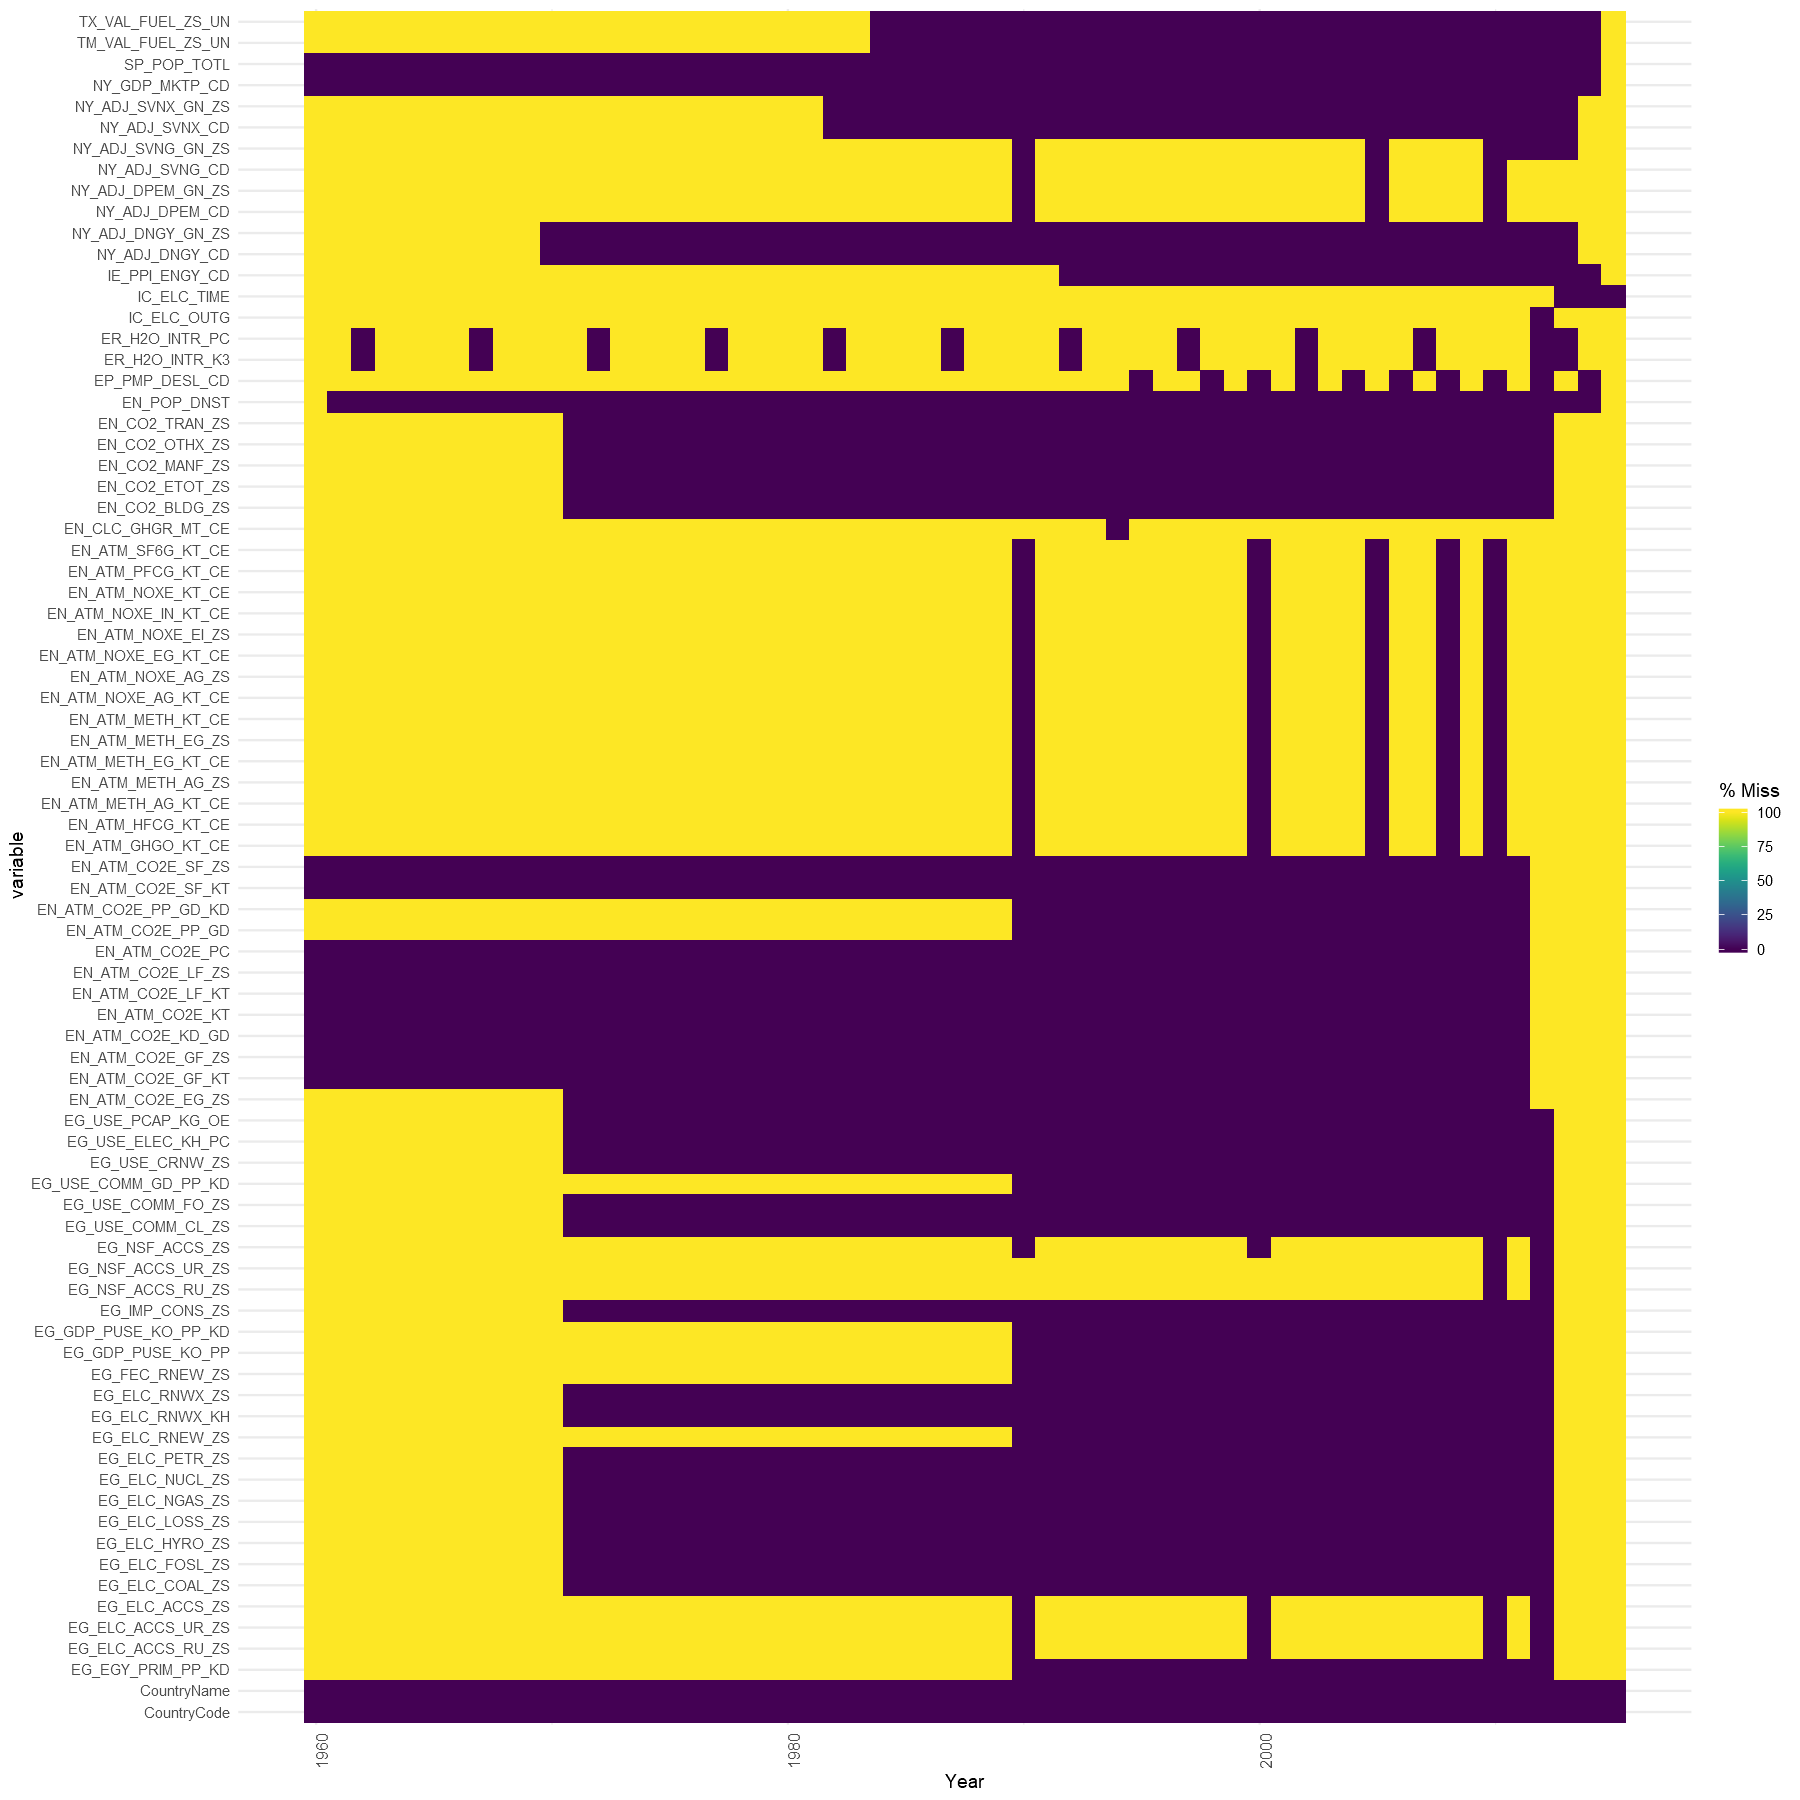

In [69]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
#options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=dfCHN, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=10))

Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


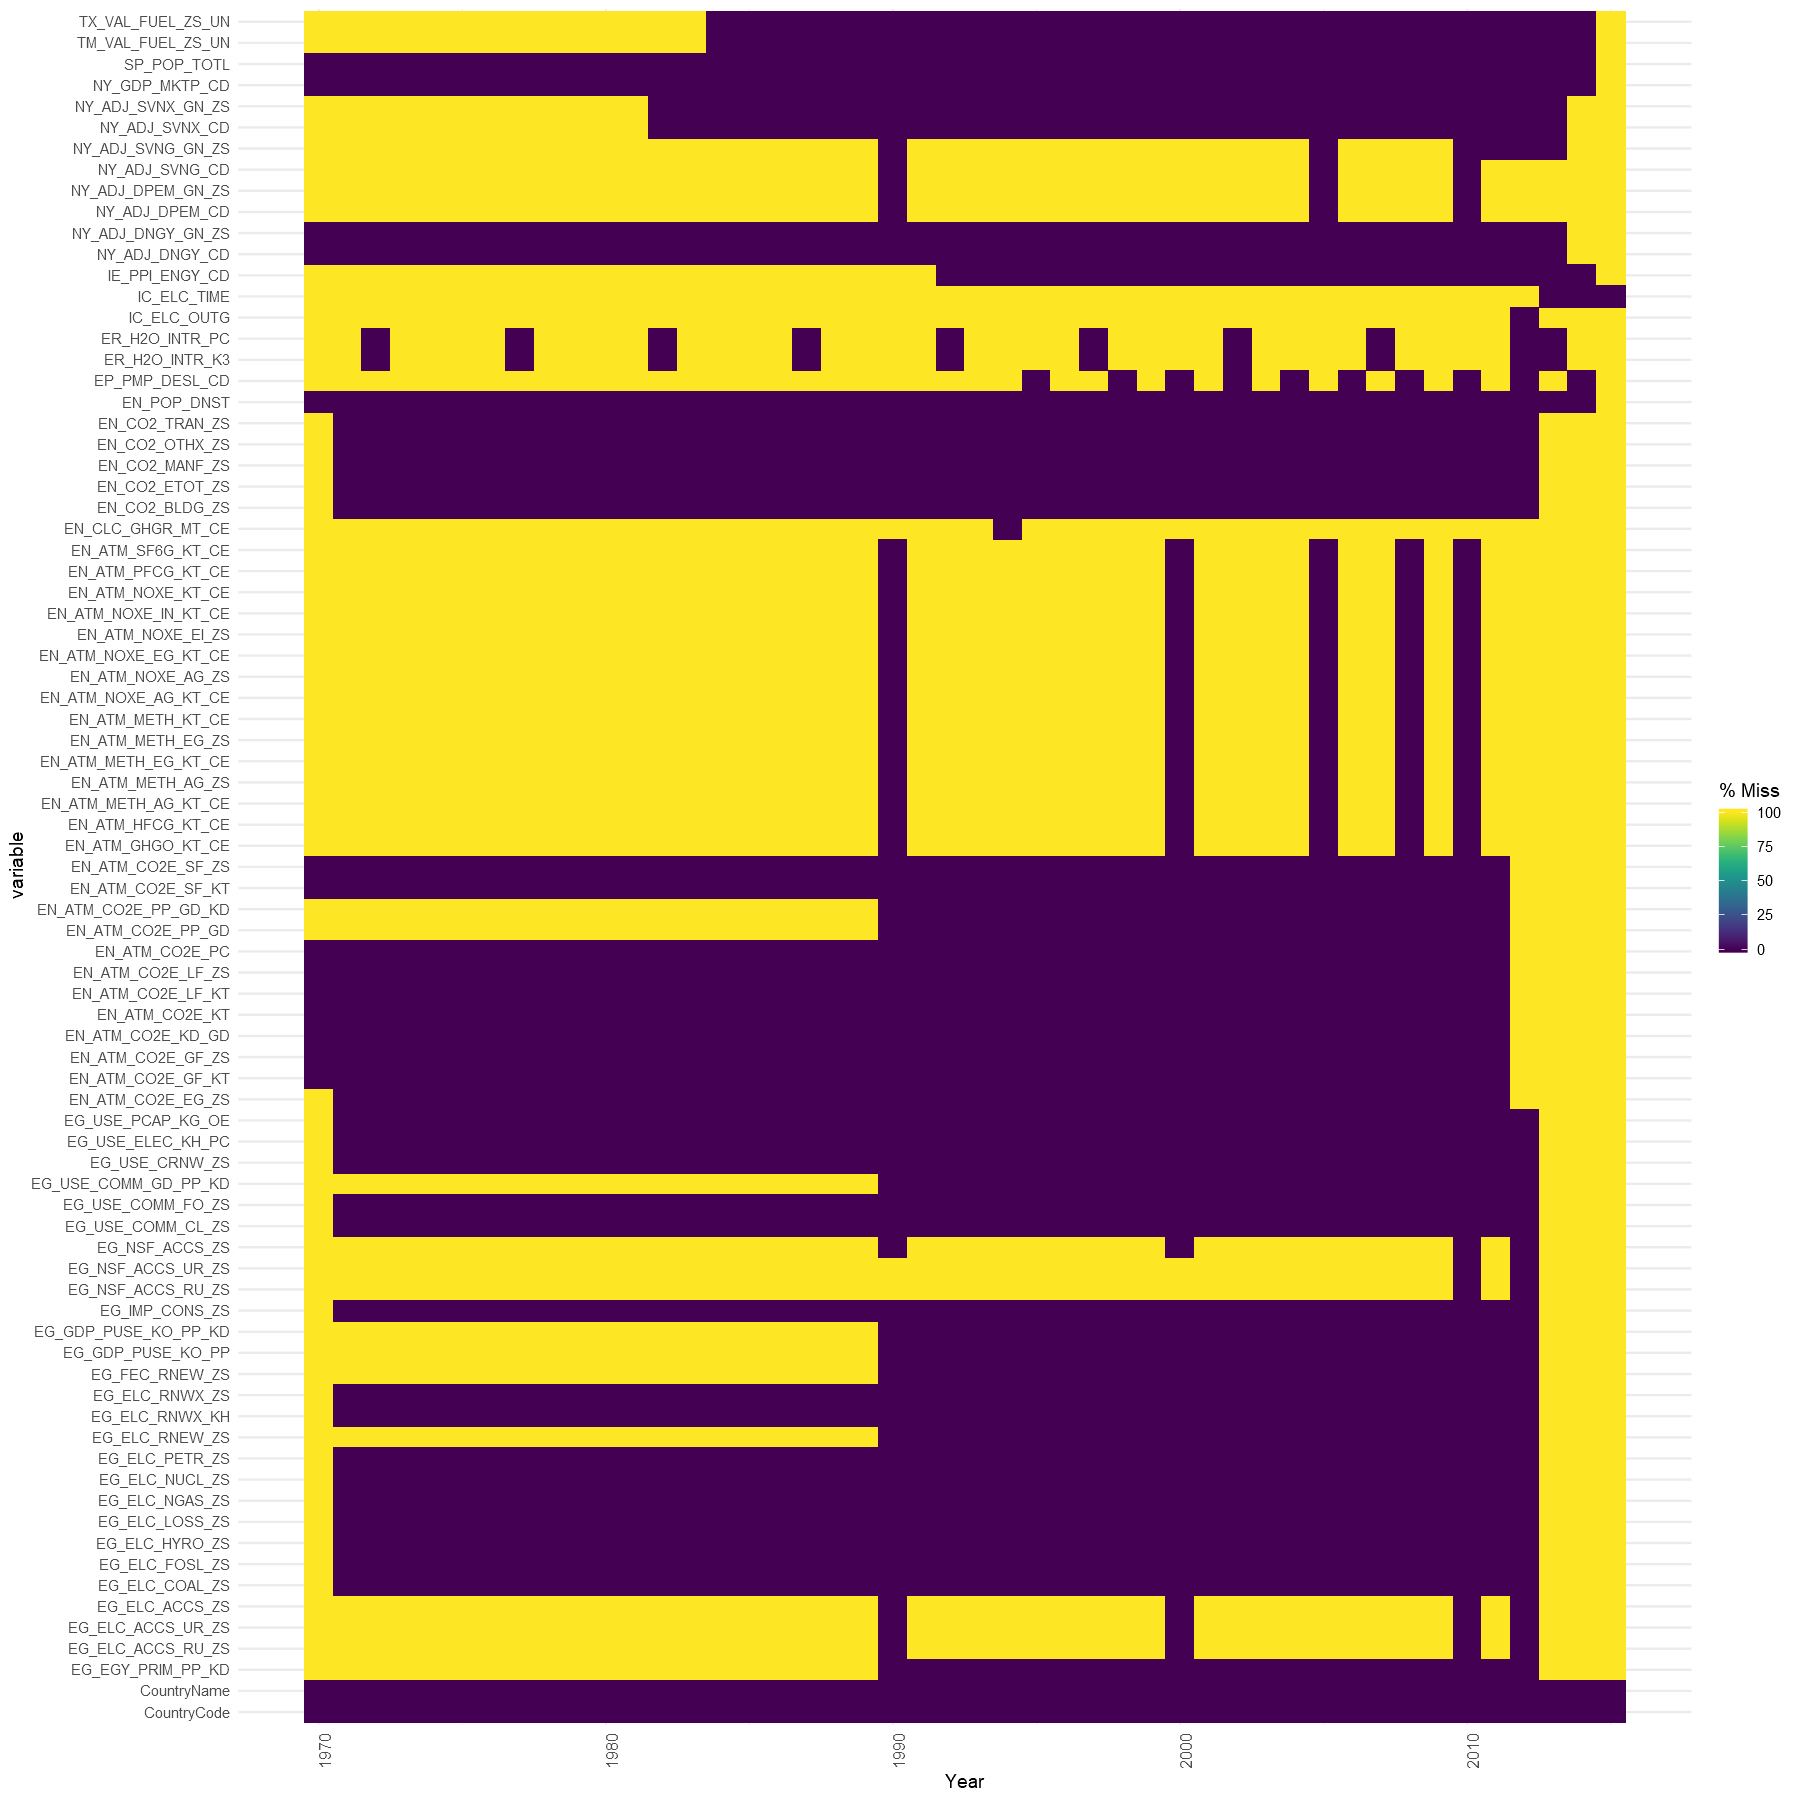

In [70]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
#options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=dfCHN70, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=10))

Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


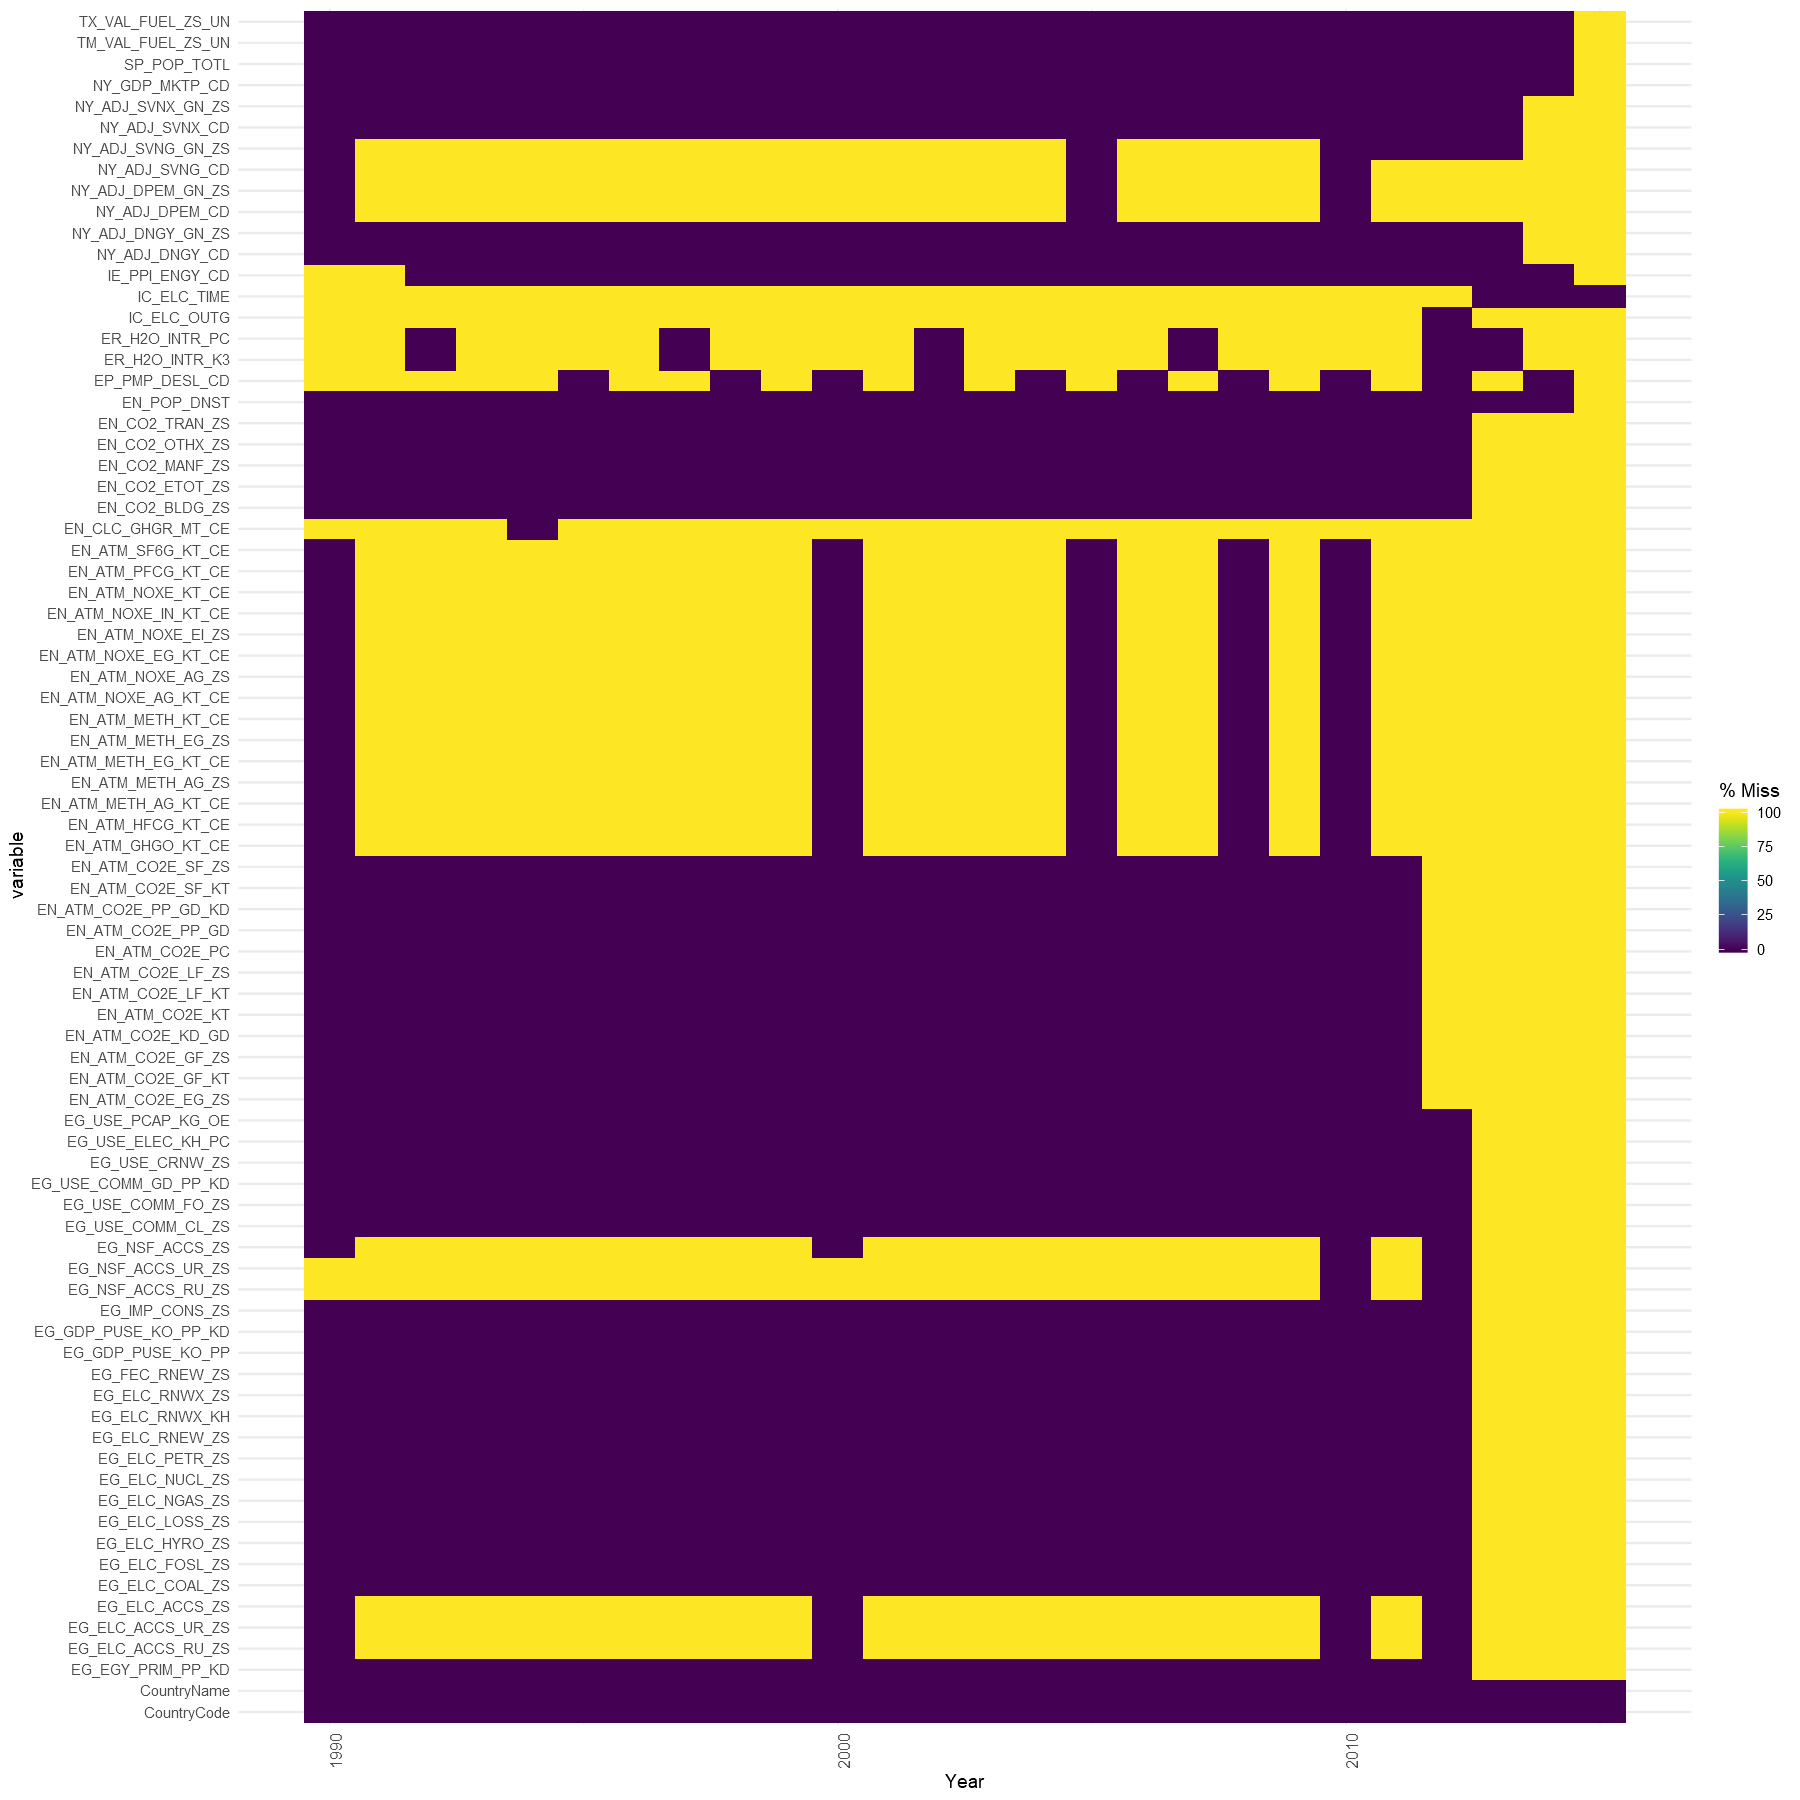

In [71]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
#options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=dfCHN90, fct=Year) + 
theme(axis.text.x = element_text(angle=90, size=10))

In [72]:
getMissingness(dfDEU)

[[1]]
                 var na.count  rate
1        IC_ELC_OUTG       56 100.0
2     IE_PPI_ENGY_CD       56 100.0
3  EG_NSF_ACCS_UR_ZS       54  96.4
4  EG_NSF_ACCS_RU_ZS       54  96.4
5     NY_ADJ_SVNG_CD       54  96.4
6  NY_ADJ_DPEM_GN_ZS       53  94.6
7     NY_ADJ_DPEM_CD       53  94.6
8     EG_NSF_ACCS_ZS       52  92.9
9  EG_ELC_ACCS_RU_ZS       52  92.9
10 EG_ELC_ACCS_UR_ZS       52  92.9

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 56 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
IC_ELC_OUTG,56,100.0
IE_PPI_ENGY_CD,56,100.0
EG_NSF_ACCS_UR_ZS,54,96.4
EG_NSF_ACCS_RU_ZS,54,96.4
NY_ADJ_SVNG_CD,54,96.4
NY_ADJ_DPEM_GN_ZS,53,94.6
NY_ADJ_DPEM_CD,53,94.6
EG_NSF_ACCS_ZS,52,92.9
EG_ELC_ACCS_RU_ZS,52,92.9


In [105]:
na_less_40_pct_DEU <-missing_less_40_pct(dfDEU)
na_less_40_pct_DEU

var,na.count,rate
<fct>,<dbl>,<dbl>
NY_ADJ_DNGY_GN_ZS,12,21.4
NY_ADJ_DNGY_CD,12,21.4
NY_GDP_MKTP_CD,11,19.6
EN_CO2_OTHX_ZS,3,5.4
TX_VAL_FUEL_ZS_UN,3,5.4
EN_CO2_MANF_ZS,3,5.4
TM_VAL_FUEL_ZS_UN,3,5.4
EG_ELC_LOSS_ZS,3,5.4
EN_CO2_ETOT_ZS,3,5.4


In [73]:
getMissingness(dfDEU70)

[[1]]
                 var na.count  rate
1        IC_ELC_OUTG       46 100.0
2     IE_PPI_ENGY_CD       46 100.0
3  EG_NSF_ACCS_UR_ZS       44  95.7
4  EG_NSF_ACCS_RU_ZS       44  95.7
5     NY_ADJ_SVNG_CD       44  95.7
6  NY_ADJ_DPEM_GN_ZS       43  93.5
7     NY_ADJ_DPEM_CD       43  93.5
8     EG_NSF_ACCS_ZS       42  91.3
9  EG_ELC_ACCS_RU_ZS       42  91.3
10 EG_ELC_ACCS_UR_ZS       42  91.3

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 46 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
IC_ELC_OUTG,46,100.0
IE_PPI_ENGY_CD,46,100.0
EG_NSF_ACCS_UR_ZS,44,95.7
EG_NSF_ACCS_RU_ZS,44,95.7
NY_ADJ_SVNG_CD,44,95.7
NY_ADJ_DPEM_GN_ZS,43,93.5
NY_ADJ_DPEM_CD,43,93.5
EG_NSF_ACCS_ZS,42,91.3
EG_ELC_ACCS_RU_ZS,42,91.3


In [106]:
na_less_40_pct_DEU70 <-missing_less_40_pct(dfDEU70)
na_less_40_pct_DEU70

var,na.count,rate
<fct>,<dbl>,<dbl>
EN_CO2_OTHX_ZS,3,6.5
EN_CO2_MANF_ZS,3,6.5
EG_ELC_LOSS_ZS,3,6.5
EN_CO2_ETOT_ZS,3,6.5
EN_CO2_TRAN_ZS,3,6.5
EG_USE_ELEC_KH_PC,3,6.5
EN_CO2_BLDG_ZS,3,6.5
EG_USE_COMM_FO_ZS,2,4.3
EG_ELC_NUCL_ZS,2,4.3


In [74]:
getMissingness(dfDEU90)

[[1]]
                 var na.count  rate
1        IC_ELC_OUTG       26 100.0
2     IE_PPI_ENGY_CD       26 100.0
3  EG_NSF_ACCS_UR_ZS       24  92.3
4  EG_NSF_ACCS_RU_ZS       24  92.3
5     NY_ADJ_SVNG_CD       24  92.3
6  NY_ADJ_DPEM_GN_ZS       23  88.5
7     NY_ADJ_DPEM_CD       23  88.5
8     EG_NSF_ACCS_ZS       22  84.6
9  EG_ELC_ACCS_RU_ZS       22  84.6
10 EG_ELC_ACCS_UR_ZS       22  84.6

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 26 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
IC_ELC_OUTG,26,100.0
IE_PPI_ENGY_CD,26,100.0
EG_NSF_ACCS_UR_ZS,24,92.3
EG_NSF_ACCS_RU_ZS,24,92.3
NY_ADJ_SVNG_CD,24,92.3
NY_ADJ_DPEM_GN_ZS,23,88.5
NY_ADJ_DPEM_CD,23,88.5
EG_NSF_ACCS_ZS,22,84.6
EG_ELC_ACCS_RU_ZS,22,84.6


In [107]:
na_less_40_pct_DEU90 <-missing_less_40_pct(dfDEU90)
na_less_40_pct_DEU90

var,na.count,rate
<fct>,<dbl>,<dbl>
EN_CLC_GHGR_MT_CE,6,23.1
EN_ATM_CO2E_GF_ZS,5,19.2
EN_ATM_CO2E_PP_GD,5,19.2
EN_ATM_CO2E_KT,5,19.2
EN_ATM_CO2E_LF_KT,5,19.2
EN_ATM_CO2E_GF_KT,5,19.2
EN_ATM_CO2E_EG_ZS,5,19.2
EN_ATM_CO2E_PC,5,19.2
EN_ATM_CO2E_LF_ZS,5,19.2


In [ ]:
getMissingness$

model metric - MAE / RMSE
usa
germany
china